
1. Create a project report in a pdf format that will consist of the following:
a. Problem Statement
b. Project Objective
c. Data Description
d. Data Pre-processing Steps and Inspiration
e. Choosing the Algorithm for the Project
f. Motivation and Reasons For Choosing the Algorithm
g. Assumptions
h. Model Evaluation and Techniques
i. Inferences from the Same
j. Future Possibilities of the Project

Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.


**import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**load data**

In [2]:
walmart_df = pd.read_csv(r'C:\Users\P Kalyani Jyothirmai\Desktop\Walmart (1).csv')
walmart_df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

**veiwing data information**

In [3]:
walmart_df.shape

(6435, 8)

In [4]:
walmart_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
walmart_df.describe().T

count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01

**convert date to date time format**

In [7]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])



**checking missing values**

In [8]:
walmart_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
walmart_df["Day"]= pd.DatetimeIndex(walmart_df['Date']).day
walmart_df['Month'] = pd.DatetimeIndex(walmart_df['Date']).month
walmart_df['Year'] = pd.DatetimeIndex(walmart_df['Date']).year
walmart_df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Day  Month  Year  
0     211.096358         8.106    2      5  2010  
1     211.242170         8.106    2     12  2010  
2     211.289143         8.106   19      2  2010  
3     211.319643         8.106   26      2  2010  
4     211.350143         8.106    3      5  2010  
...          ...           ...  ...    ...   ...  
6430  192.013558         8.684   28      9  2012  
6431  192.170412         8.667   10      5  2012  
6432  192.327265         8.667   10     12  2012  
6433  192.330854         8.667   19     10  2012  
6434  192.308899         8.667   26     10  2012  

[6435 rows x 11 columns]

In [10]:
walmart_df['Store'].nunique()

45

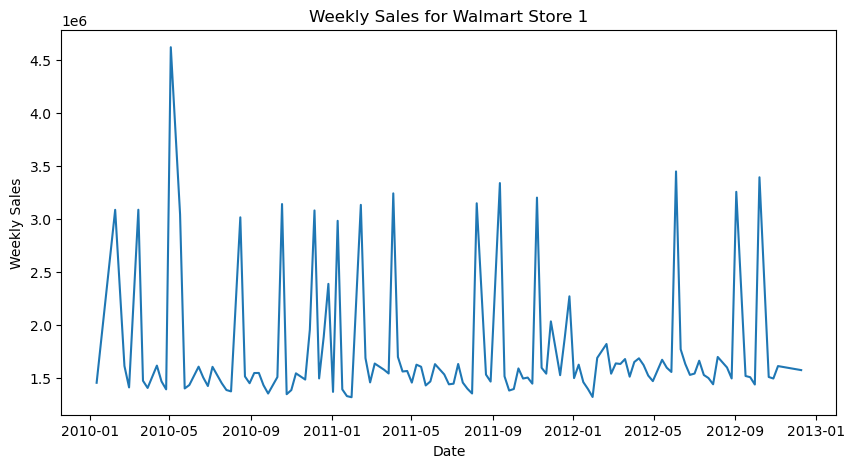

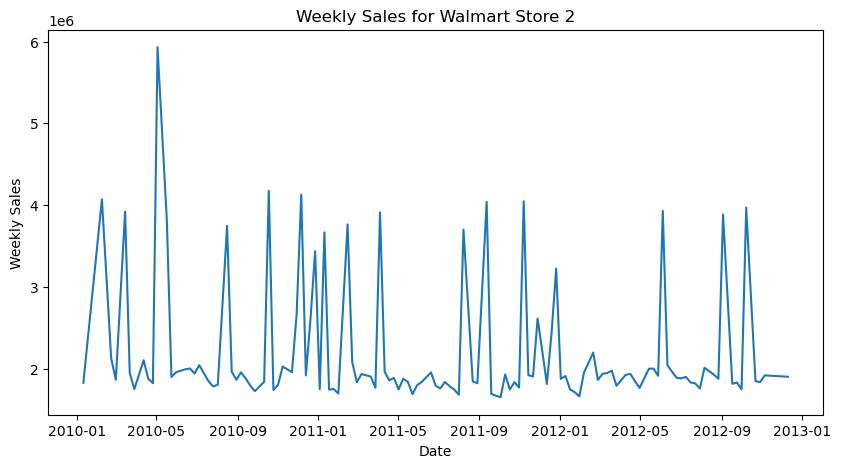

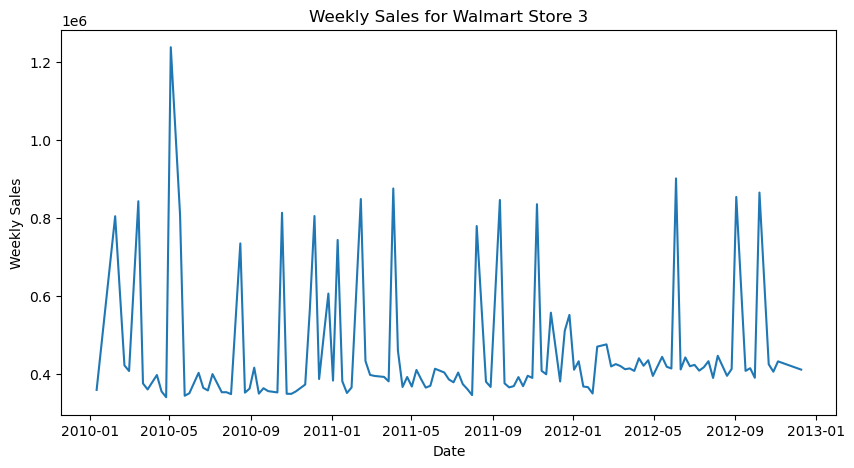

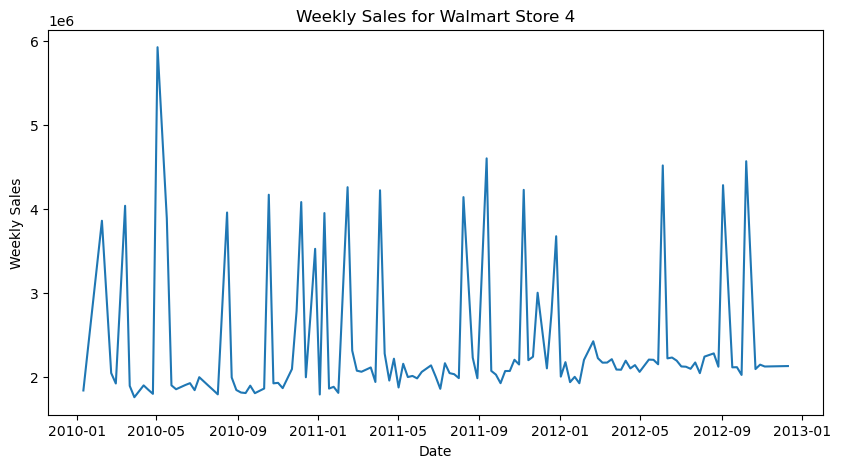

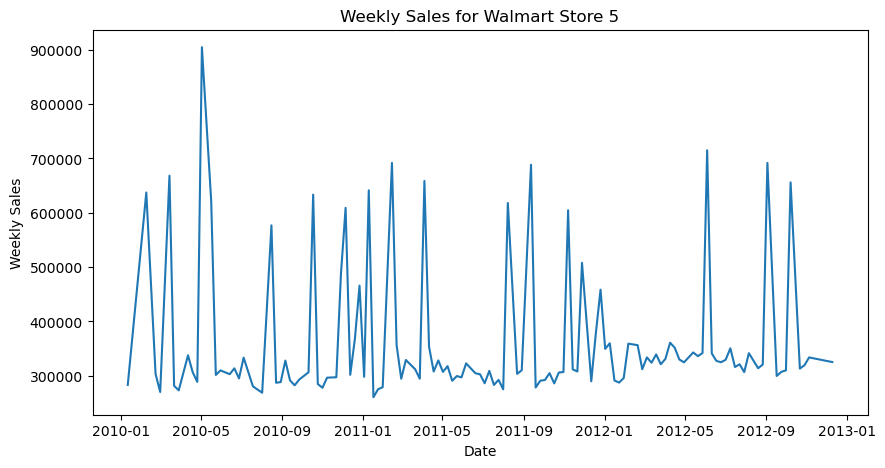

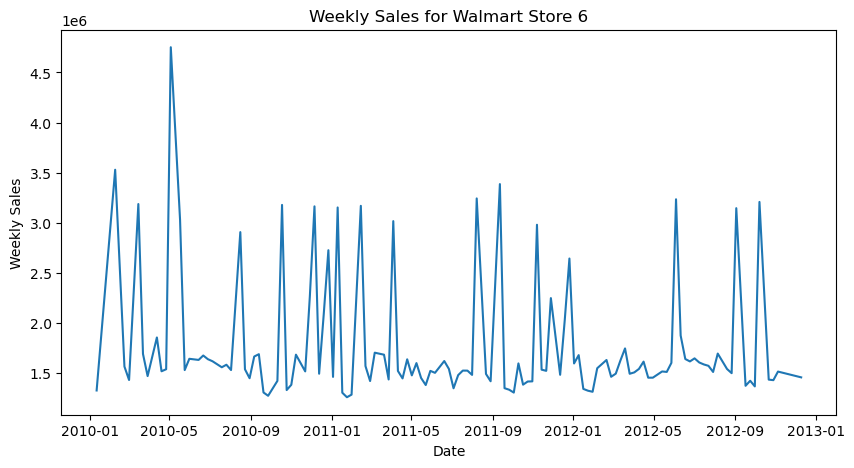

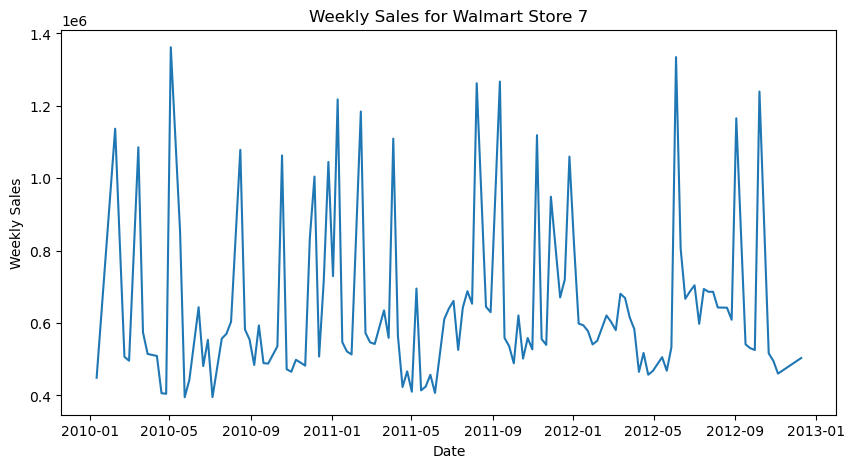

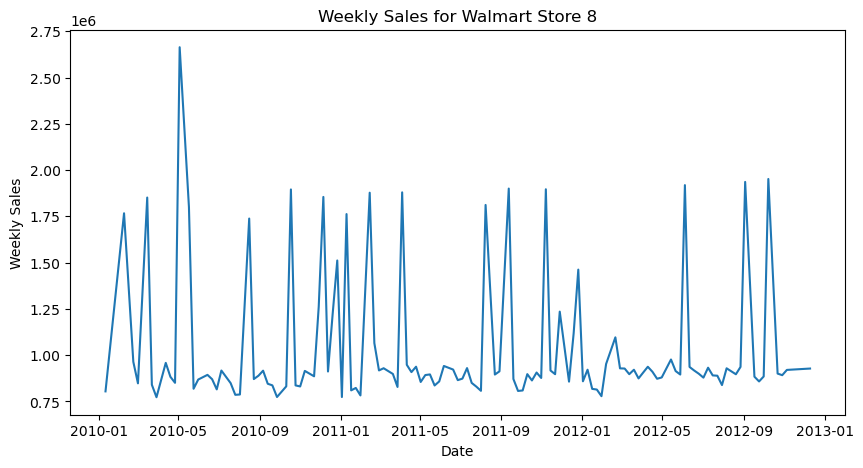

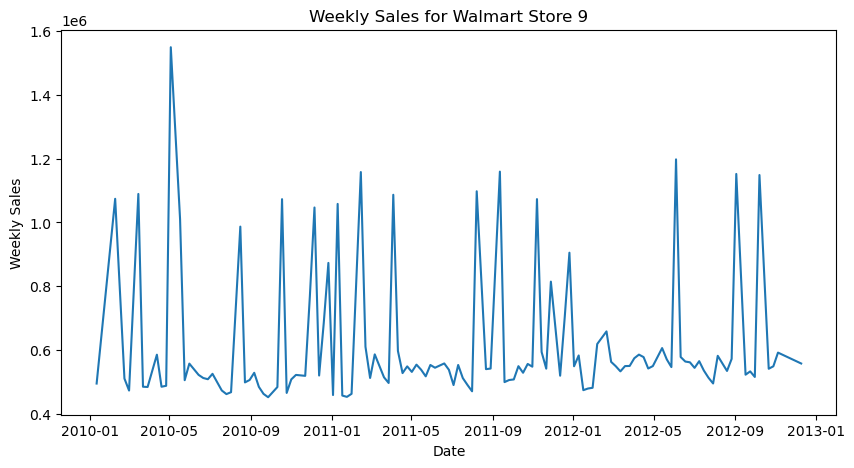

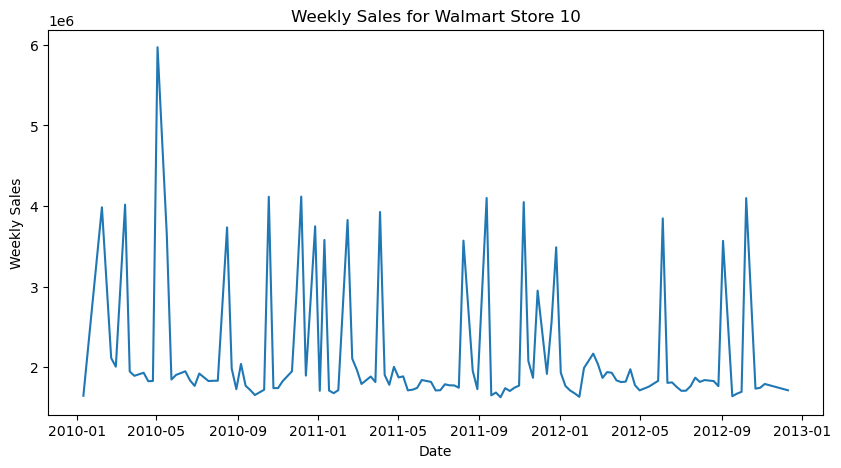

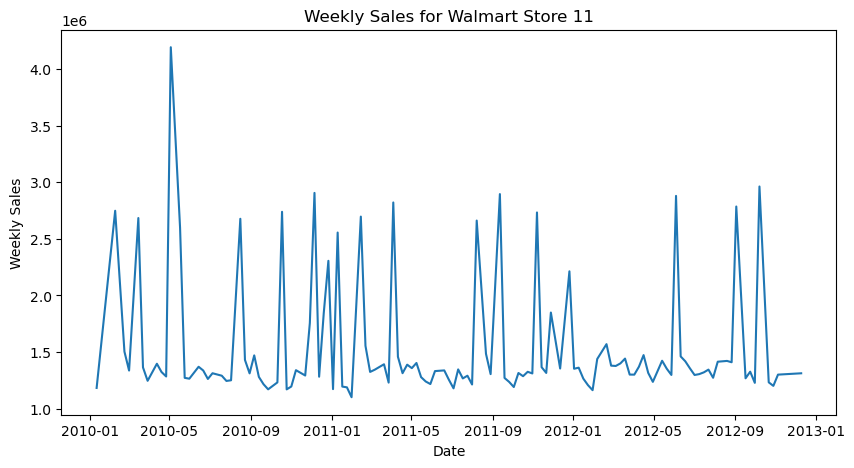

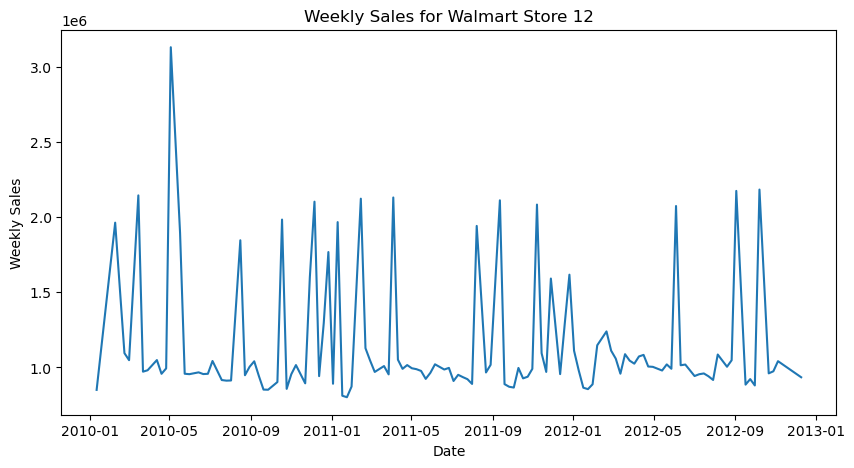

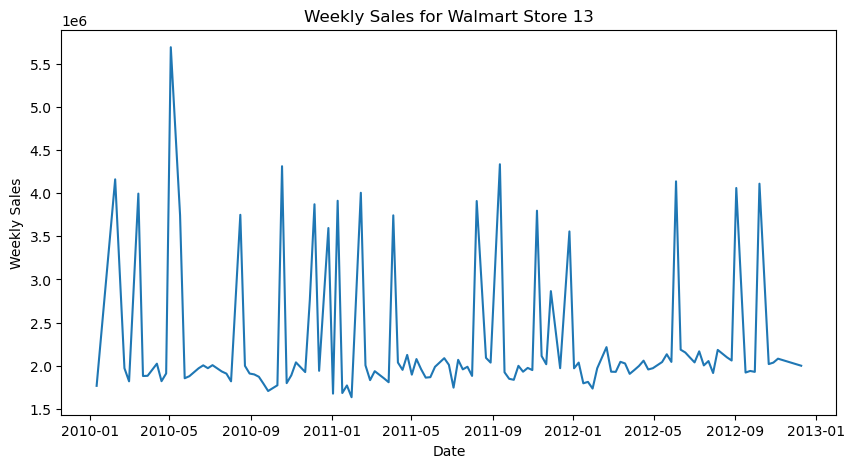

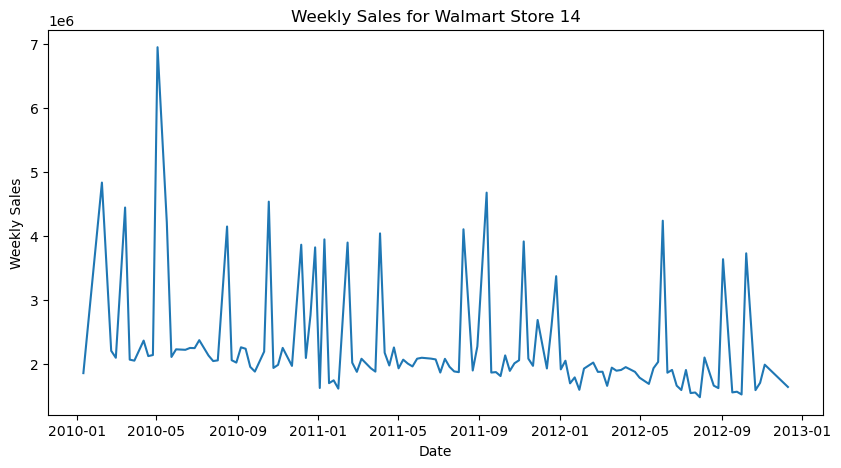

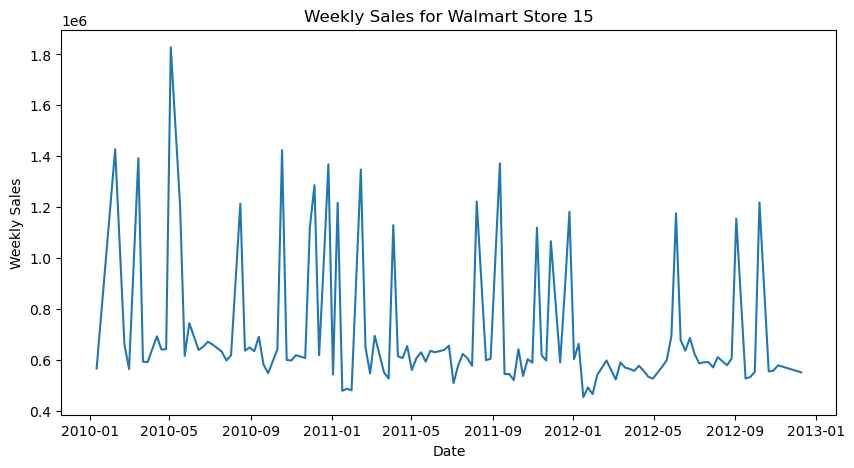

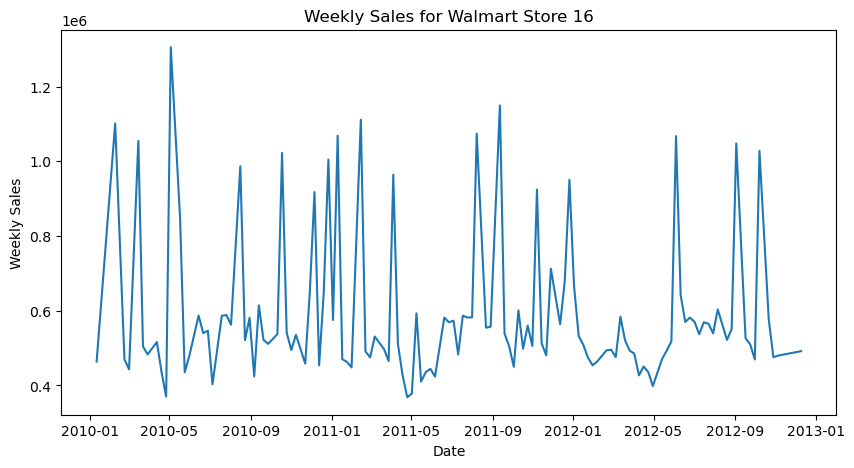

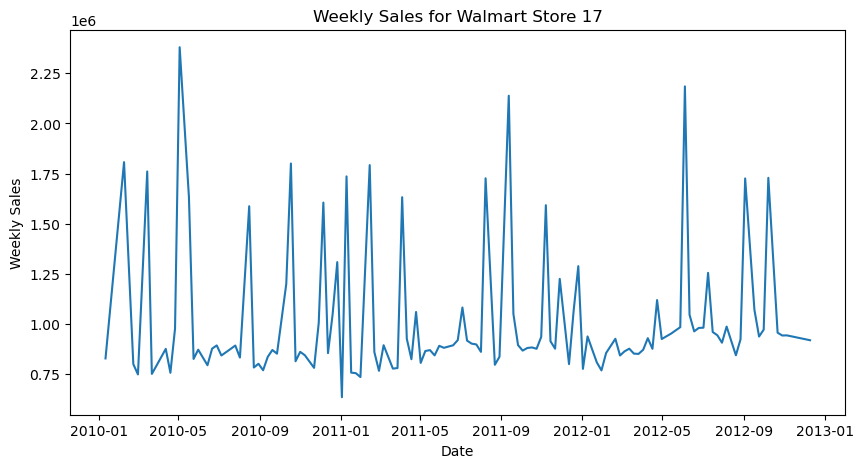

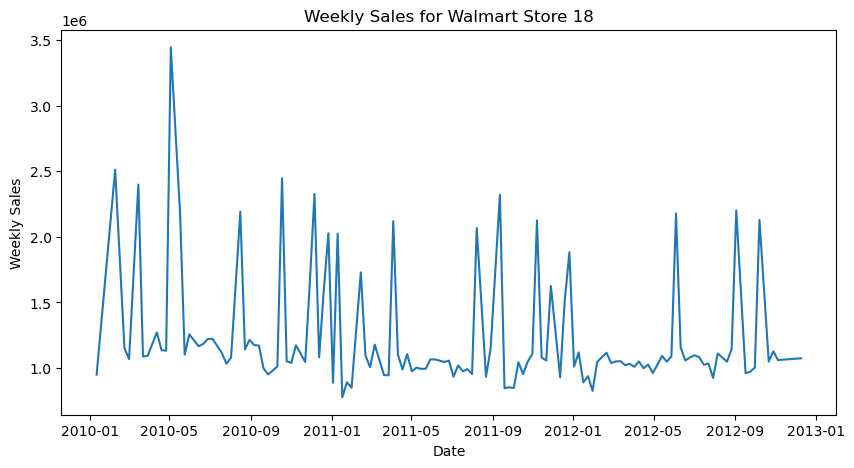

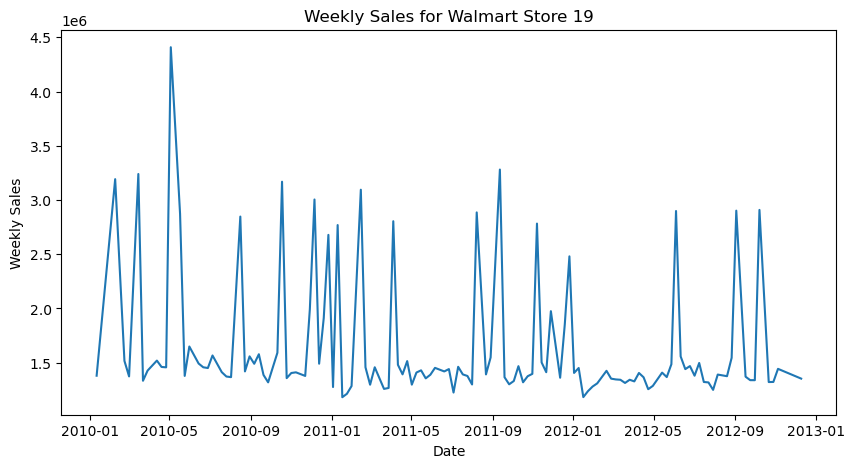

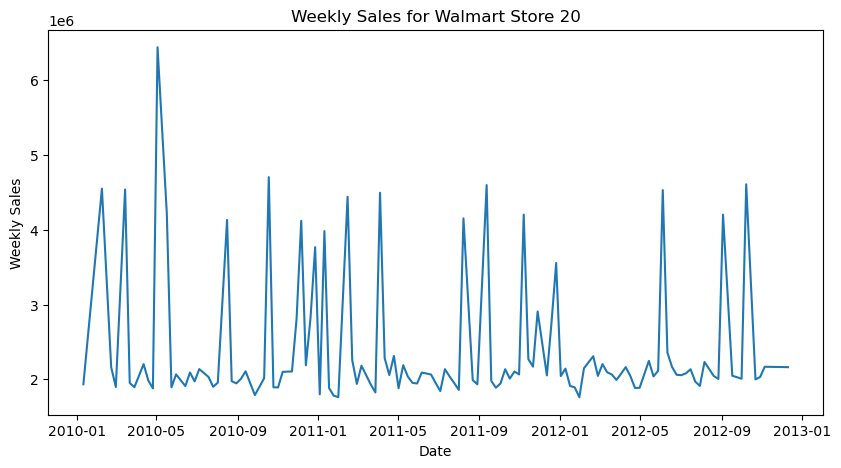

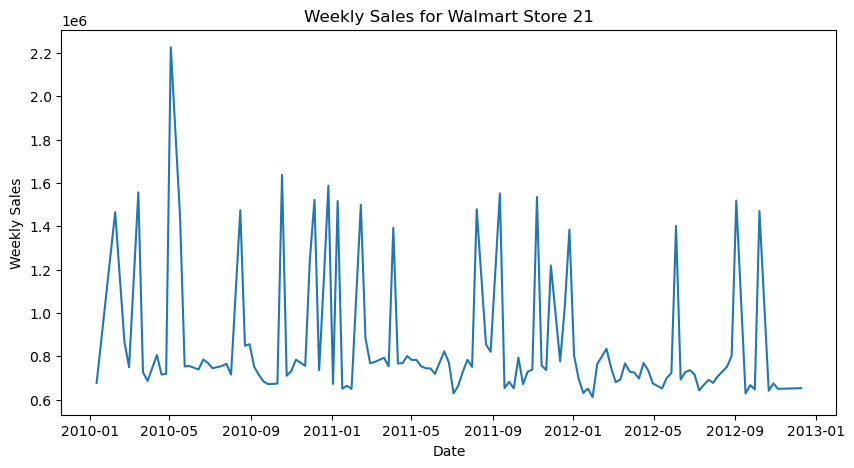

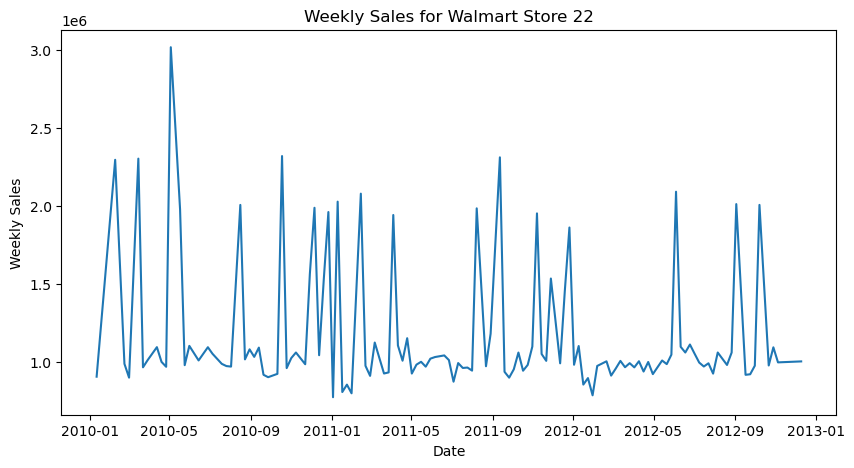

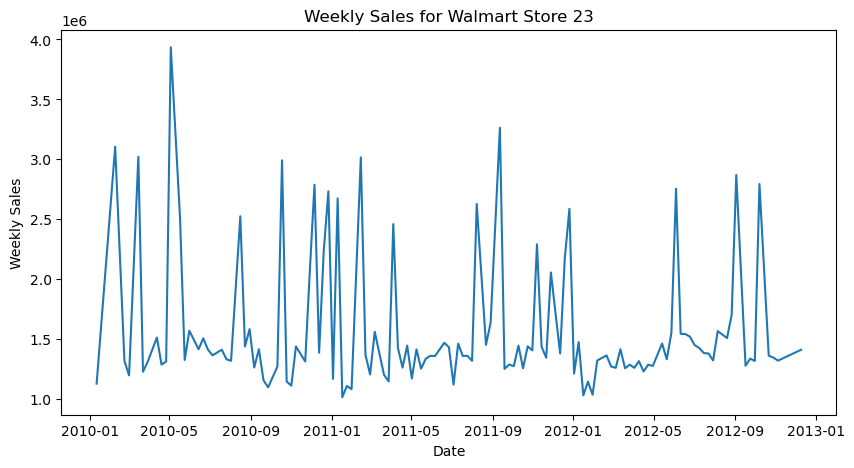

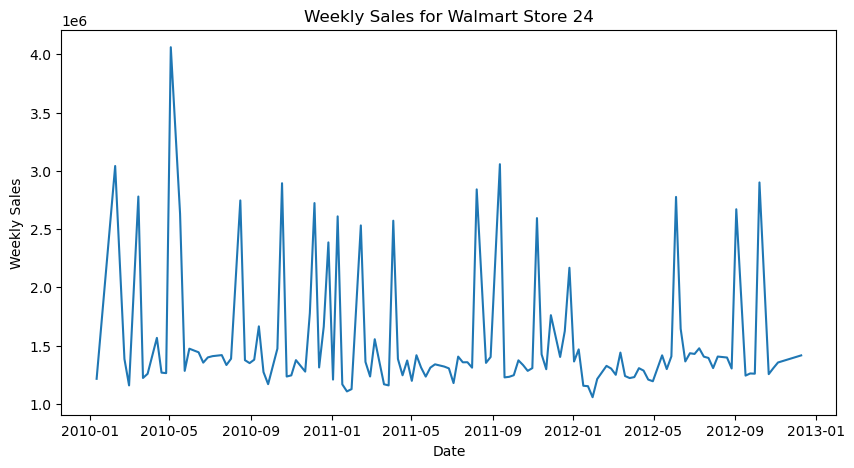

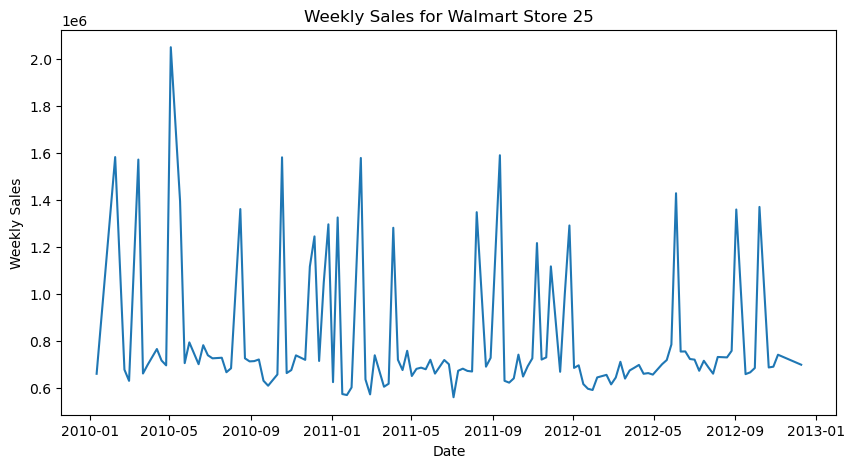

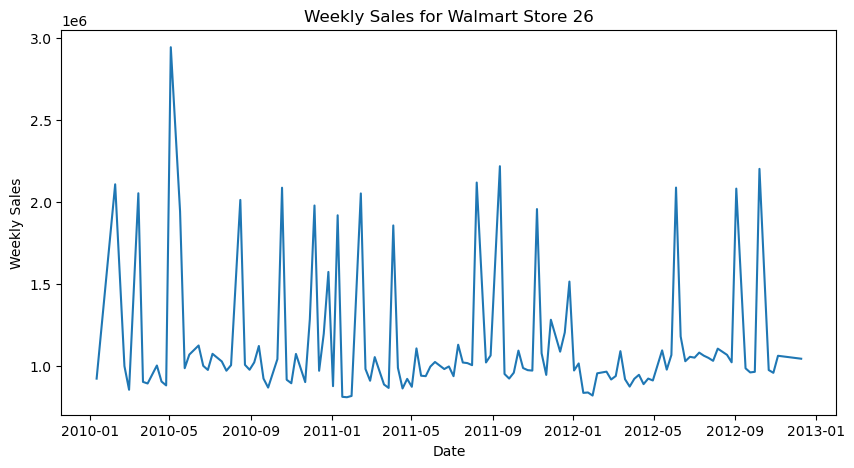

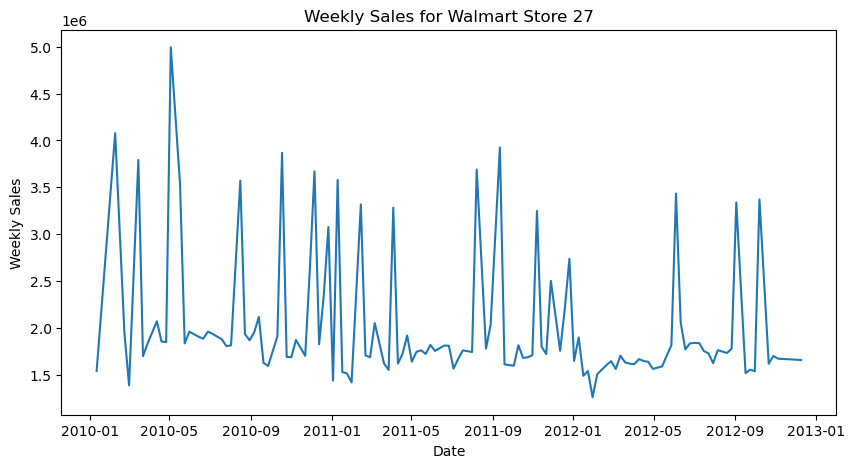

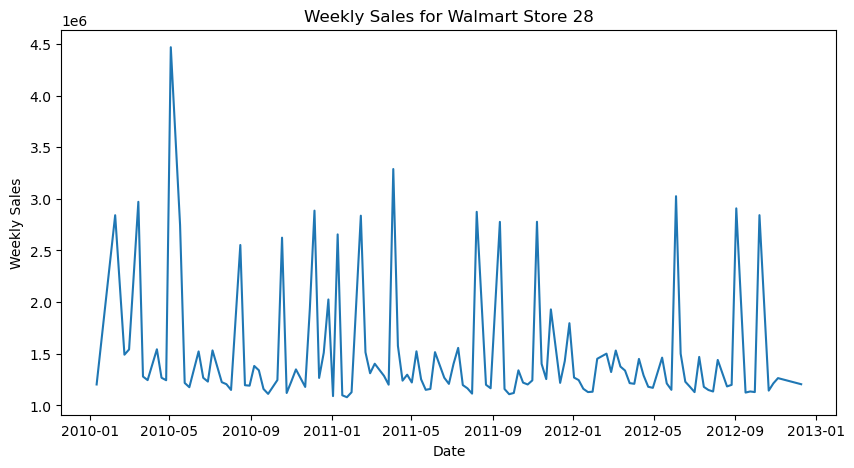

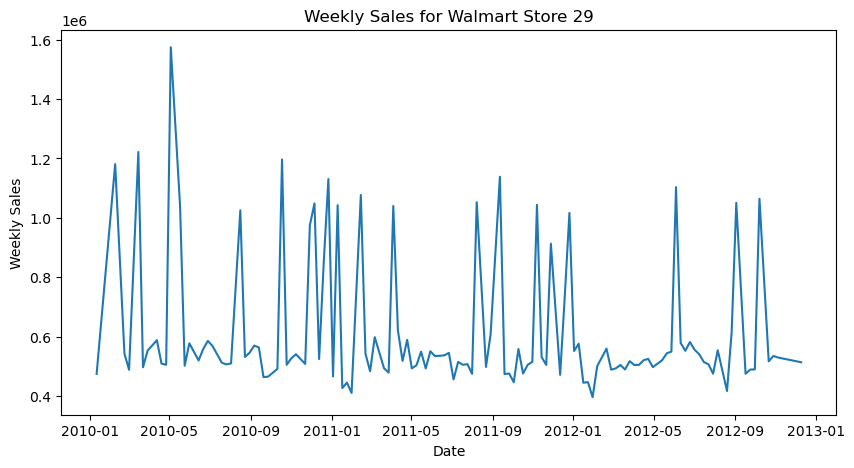

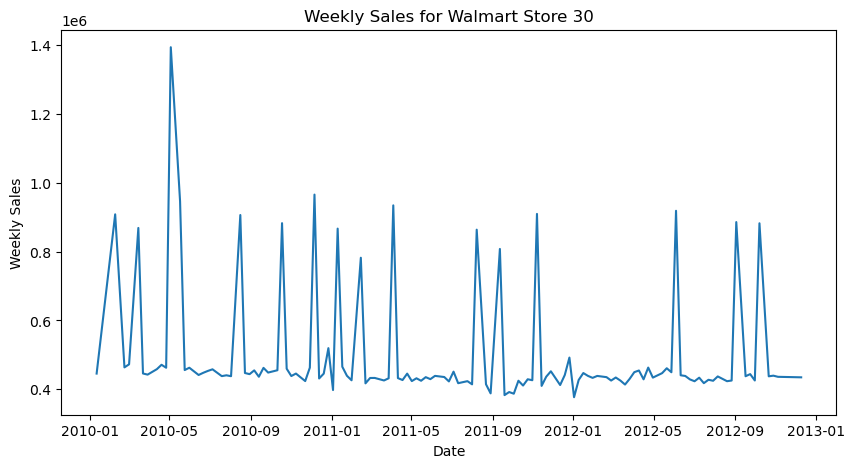

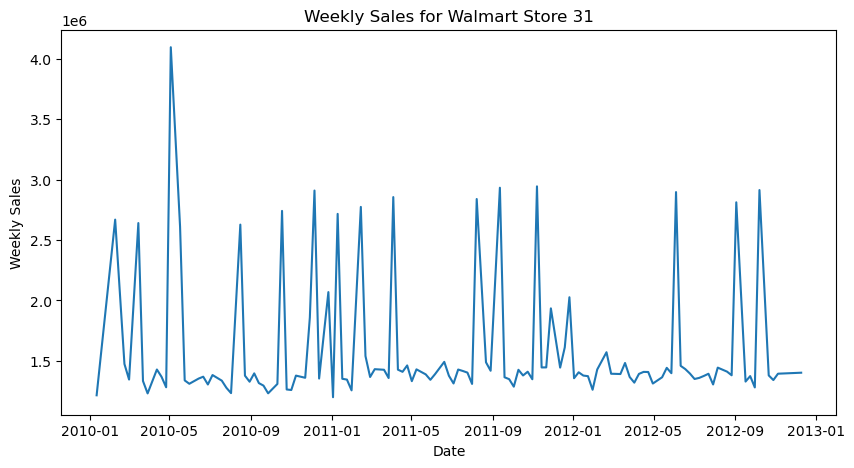

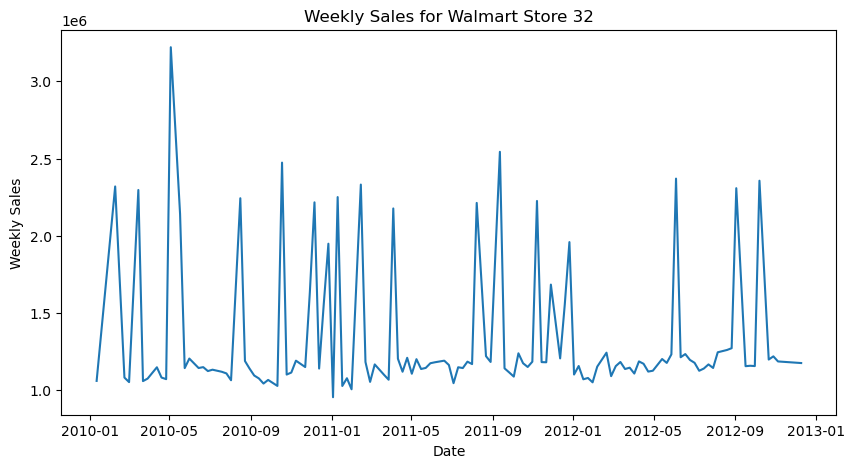

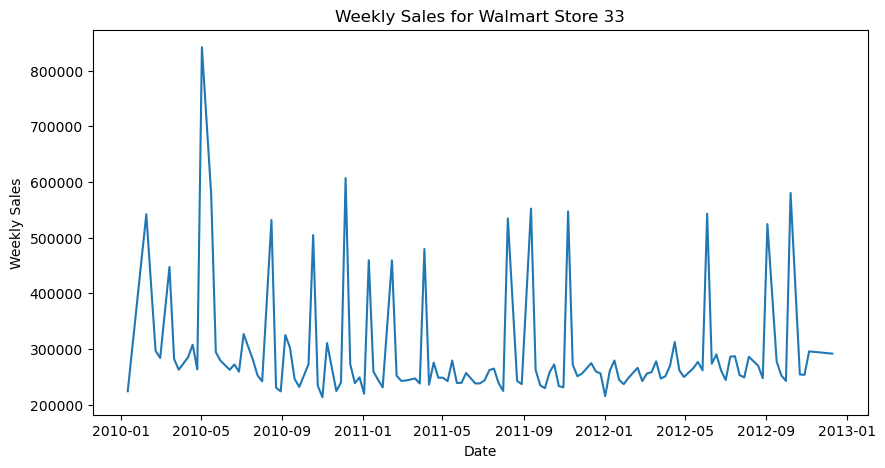

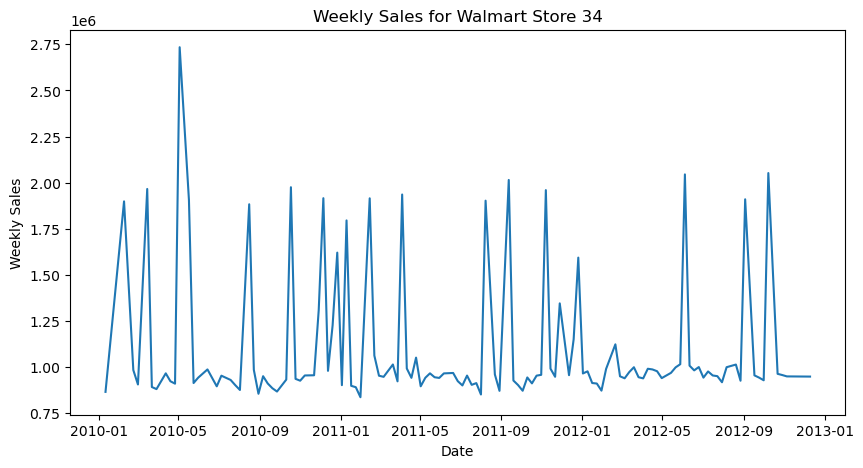

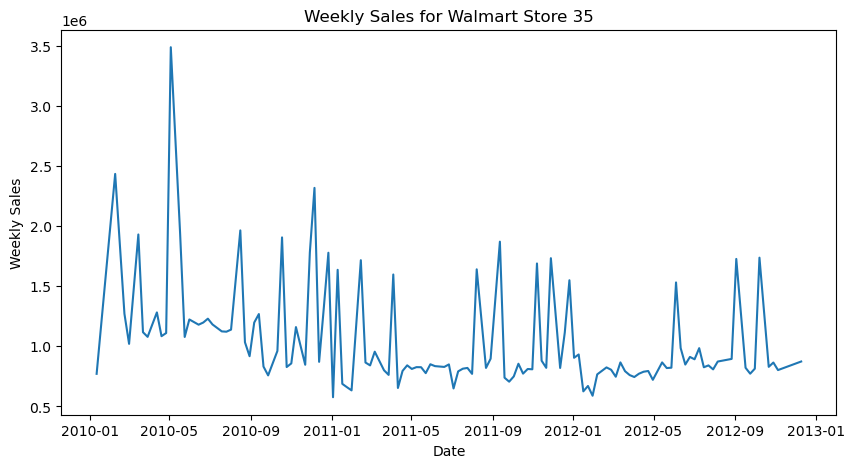

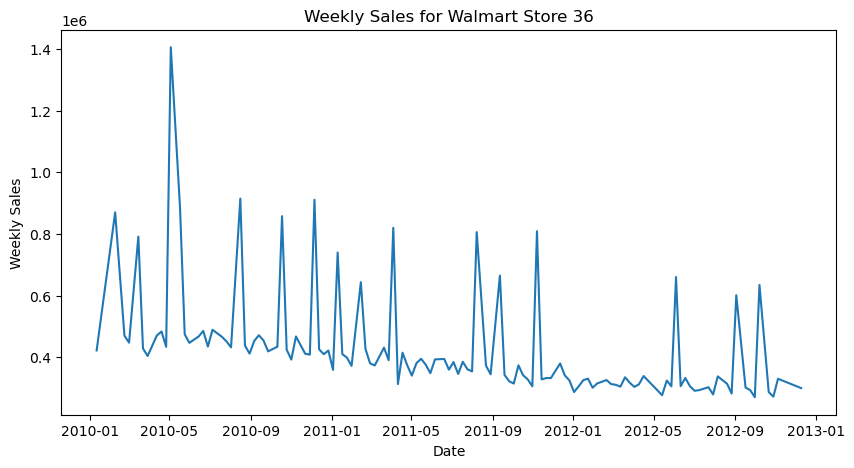

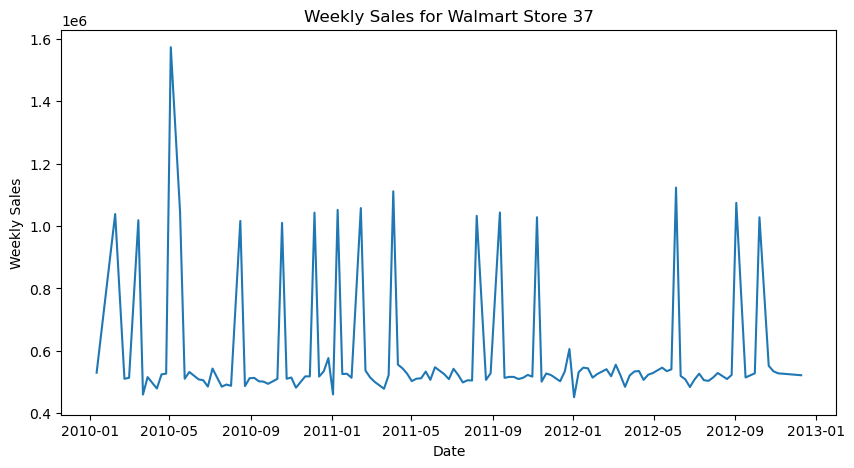

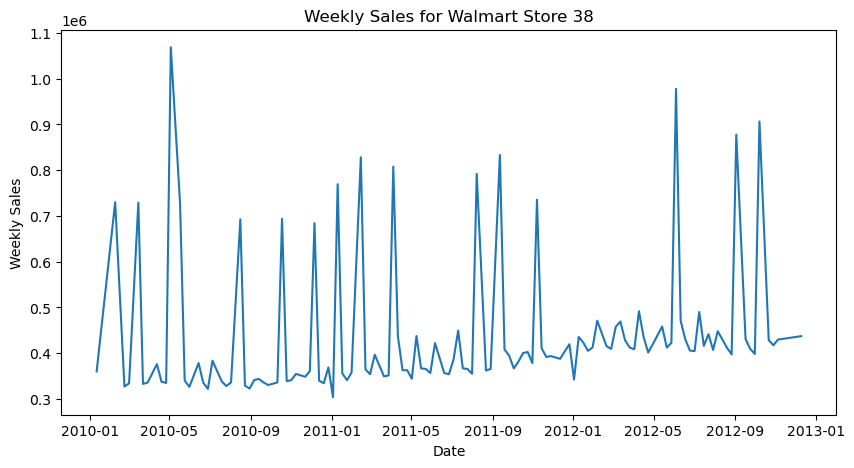

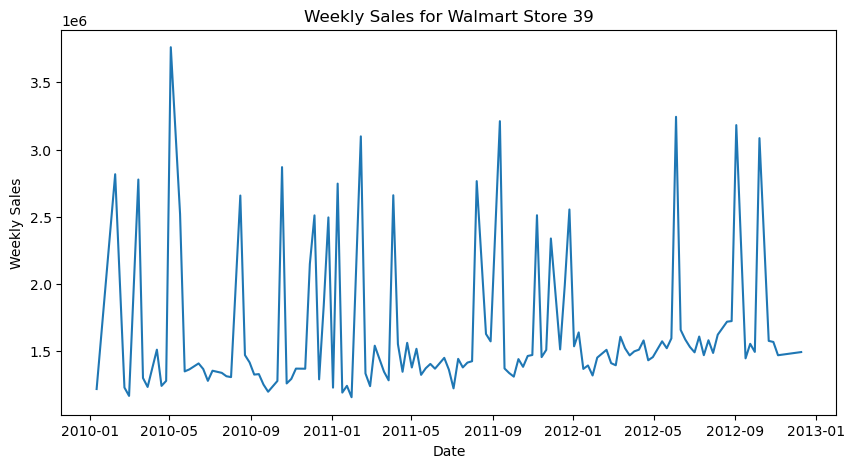

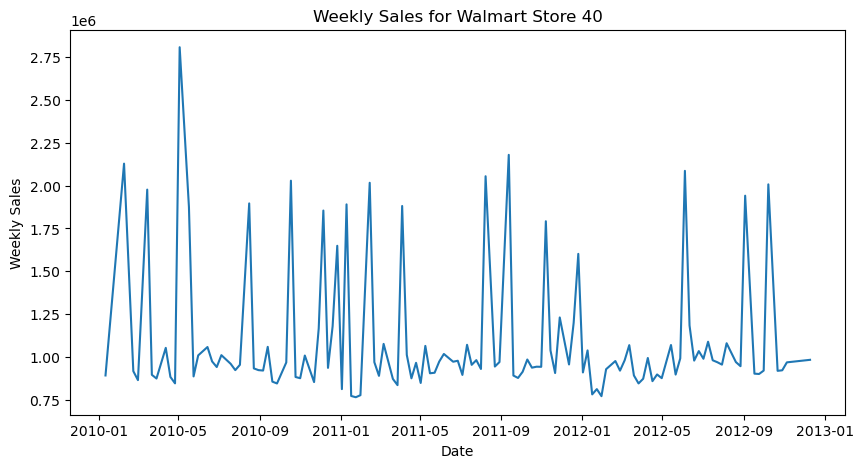

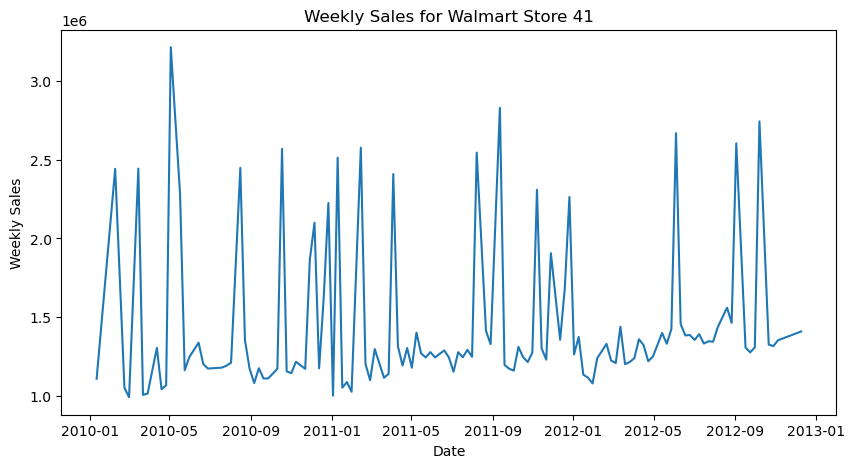

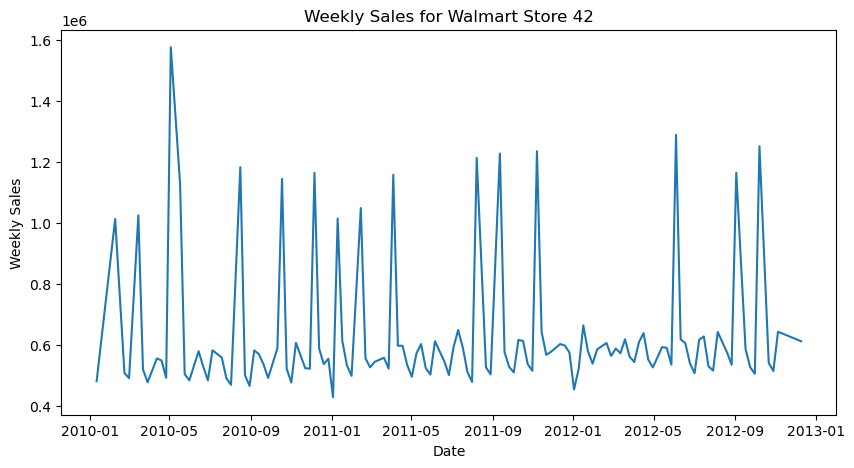

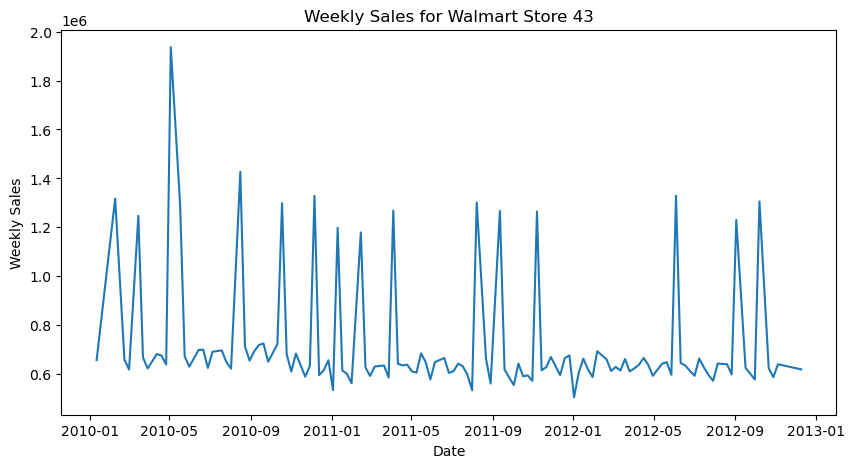

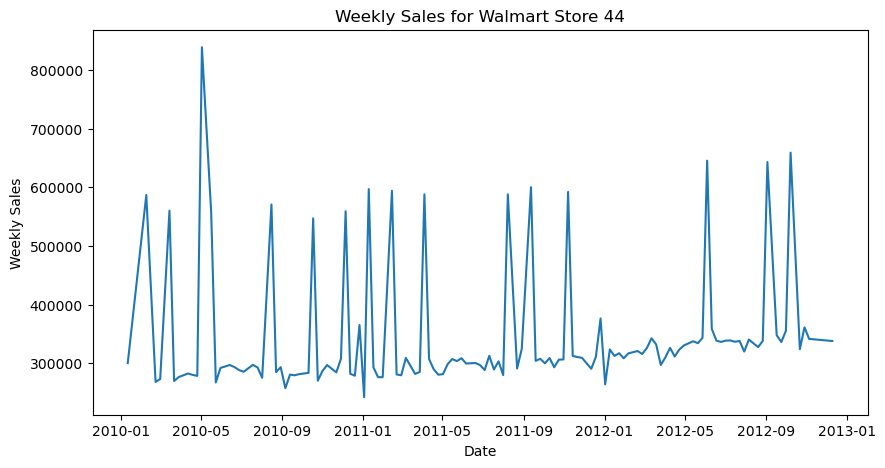

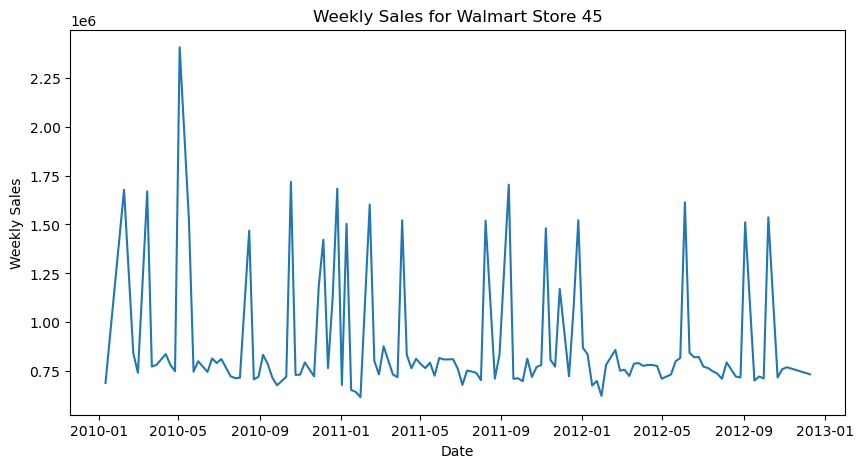

In [11]:


# Group by store and date, summing sales for each week
weekly_sales = walmart_df.groupby(['Store', pd.Grouper(key='Date', freq='W-Mon')])['Weekly_Sales'].sum().reset_index()

# Plot weekly sales for each store separately
for store in weekly_sales['Store'].unique():
    store_data = weekly_sales[weekly_sales['Store'] == store]

    plt.figure(figsize=(10, 5))
    plt.plot(store_data['Date'], store_data['Weekly_Sales'])
    plt.title(f'Weekly Sales for Walmart Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.show()


In [12]:
walmart_df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   
Day          -1.070464e-15     -0.014873 -3.603594e-02     0.089019   
Month         6.289676e-16      0.067535  3.322341e-01     0.066440   
Year          3.474318e-12     -0.018378 -5.678257e-02     0.064269   

              Fuel_Price       CPI  Unemployment           Day         Month  \
Store           0.060023 -0.209492      0.223531 -1.070464e-15  6.289676e-16   
Weekly_Sales    0.009464 -0.072634     -0.106176 -1.487292e-02  6.753523e-02   
Holiday_Flag   -0.078347 -0.002162      0.010960 -3.603594e-02  3.322341e-01   
Temperature     0.144982  0.176888      0.101158  8.901925e-02  6.643970e-02   
Fuel_Price      1.000000 -0.170642     -0.034684  3.253169e-02 -5.283174e-02   
CPI            -0.170642  1.000000     -0.302020  3.965821e-03  1.478843e-03   
Unemployment   -0.034684 -0.302020      1.000000 -8.166853e-03 -2.061552e-03   
Day             0.032532  0.003966     -0.008167  1.000000e+00  5.959249e-03   
Month          -0.052832  0.001479     -0.002062  5.959249e-03  1.000000e+00   
Year            0.779470  0.074796     -0.241813 -1.277942e-02 -1.390145e-01   

                      Year  
Store         3.474318e-12  
Weekly_Sales -1.837754e-02  
Holiday_Flag -5.678257e-02  
Temperature   6.426923e-02  
Fuel_Price    7.794703e-01  
CPI           7.479573e-02  
Unemployment -2.418135e-01  
Day          -1.277942e-02  
Month        -1.390145e-01  
Year          1.000000e+00

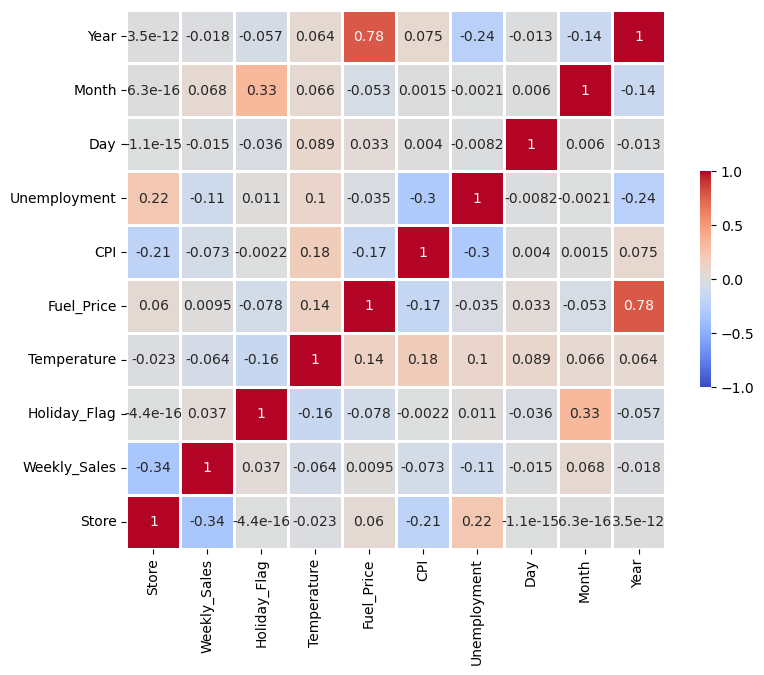

In [13]:
plt.figure(figsize=(9,7))

sns.heatmap(walmart_df.corr(),annot=True, cmap="coolwarm",linewidths=2,vmax=1, vmin=-1, square=True,
                 cbar_kws={"shrink": 0.4}).invert_yaxis()

The correlation matrix shows that weekly sales are  influenced by store and unemploymente. Hence, we look into individual features to gather more insights.



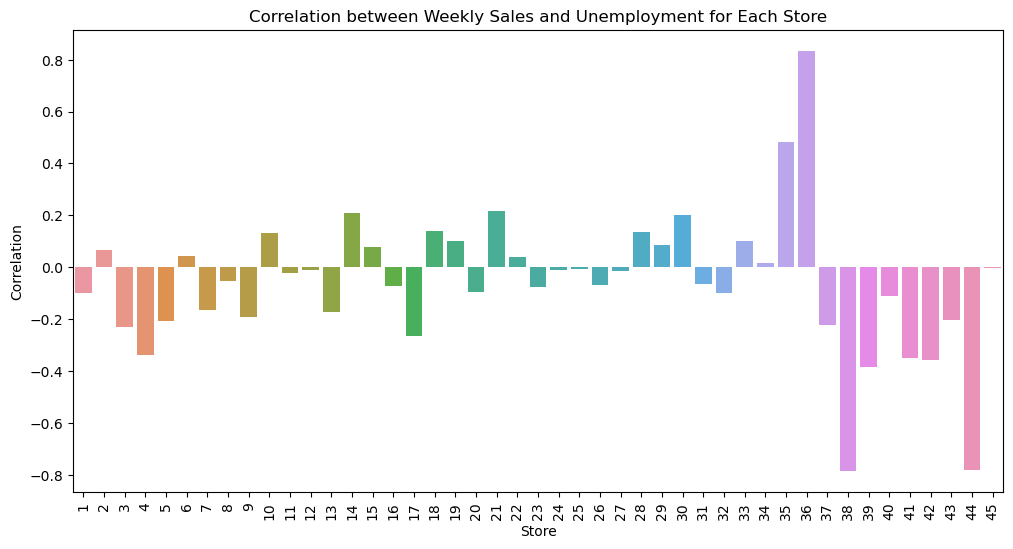

In [14]:


# Group by store and calculate the correlation between weekly sales and unemployment for each store
correlations = walmart_df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment'])).reset_index(name='Correlation')

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation', data=correlations)
plt.title('Correlation between Weekly Sales and Unemployment for Each Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()


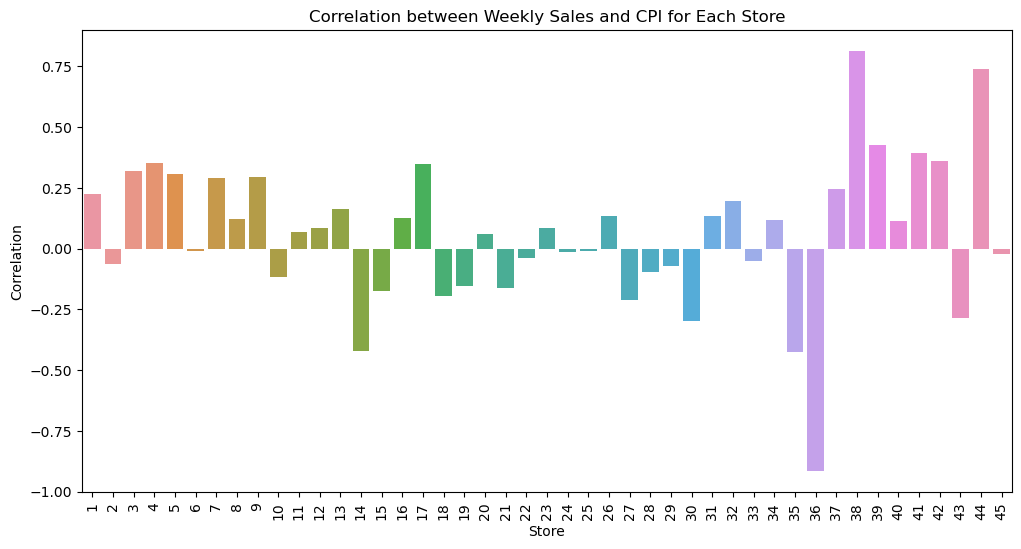

In [15]:
# Group by store and calculate the correlation between weekly sales and CPI for each store
correlations = walmart_df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI'])).reset_index(name='Correlation')

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation', data=correlations)
plt.title('Correlation between Weekly Sales and CPI for Each Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

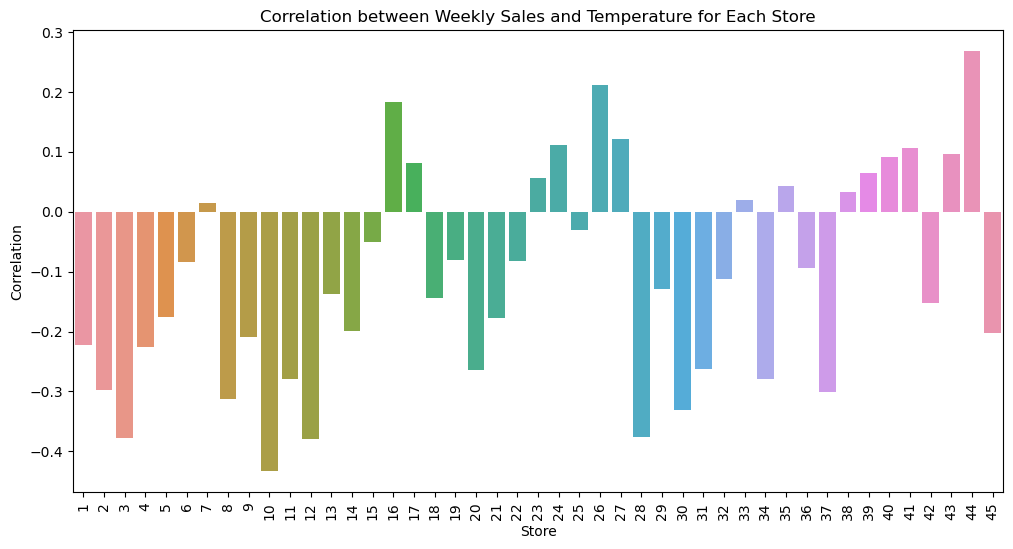

In [16]:
# Group by store and calculate the correlation between weekly sales and Temperature for each store
correlations = walmart_df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Temperature'])).reset_index(name='Correlation')

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation', data=correlations)
plt.title('Correlation between Weekly Sales and Temperature for Each Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

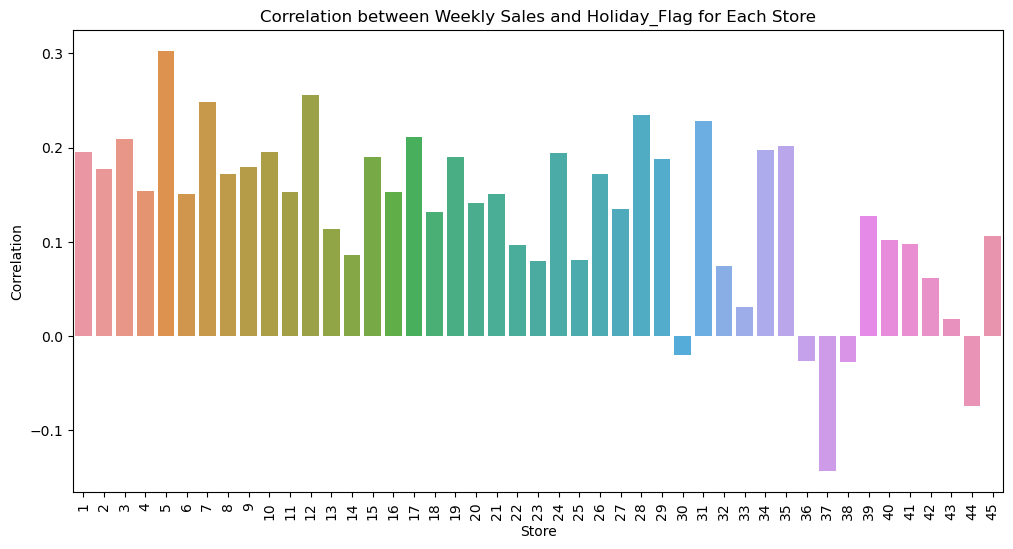

In [17]:
# Group by store and calculate the correlation between weekly sales and Holiday_Flag for each store
correlations = walmart_df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Holiday_Flag'])).reset_index(name='Correlation')

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Correlation', data=correlations)
plt.title('Correlation between Weekly Sales and Holiday_Flag for Each Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

In [18]:
store_count = walmart_df['Store'].value_counts().unique()
print(f"each store reported {store_count[0]} weekly sales")

each store reported 143 weekly sales


In [19]:
highest_weekly_sales = walmart_df .groupby(['Store'])["Weekly_Sales"].sum().reset_index().sort_values("Weekly_Sales", ascending = False)
highest_weekly_sales

Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515963e+07
35     36  5.341221e+07
4       5  4.547569e+07
43     44  4.329309e+07
32     33  3.716022e+07

In [20]:
store_list = highest_weekly_sales['Store'].tolist()


In [21]:
highest_10 = highest_weekly_sales['Store'].head(10).tolist()
highest_10

[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]

In [22]:
store1= walmart_df[walmart_df['Store']==1]
store2= walmart_df[walmart_df['Store']==2]
store3= walmart_df[walmart_df['Store']==3]
store4= walmart_df[walmart_df['Store']==4]
store5= walmart_df[walmart_df['Store']==5]
store6= walmart_df[walmart_df['Store']==6]
store7= walmart_df[walmart_df['Store']==7]
store8= walmart_df[walmart_df['Store']==8]
store9= walmart_df[walmart_df['Store']==9]
store10= walmart_df[walmart_df['Store']==10]
store11= walmart_df[walmart_df['Store']==11]
store12= walmart_df[walmart_df['Store']==12]
store13= walmart_df[walmart_df['Store']==13]
store14= walmart_df[walmart_df['Store']==14]
store15= walmart_df[walmart_df['Store']==15]
store16= walmart_df[walmart_df['Store']==16]
store17= walmart_df[walmart_df['Store']==17]
store18= walmart_df[walmart_df['Store']==18]
store19= walmart_df[walmart_df['Store']==19]
store20= walmart_df[walmart_df['Store']==20]
store21= walmart_df[walmart_df['Store']==21]
store22= walmart_df[walmart_df['Store']==22]
store23= walmart_df[walmart_df['Store']==23]
store24= walmart_df[walmart_df['Store']==24]
store25= walmart_df[walmart_df['Store']==25]
store26= walmart_df[walmart_df['Store']==26]
store27= walmart_df[walmart_df['Store']==27]
store28= walmart_df[walmart_df['Store']==28]
store29= walmart_df[walmart_df['Store']==29]
store30= walmart_df[walmart_df['Store']==30]
store31= walmart_df[walmart_df['Store']==31]
store32= walmart_df[walmart_df['Store']==32]
store33= walmart_df[walmart_df['Store']==33]
store34= walmart_df[walmart_df['Store']==34]
store35= walmart_df[walmart_df['Store']==35]
store36= walmart_df[walmart_df['Store']==36]
store37= walmart_df[walmart_df['Store']==37]
store38= walmart_df[walmart_df['Store']==38]
store39= walmart_df[walmart_df['Store']==39]
store40= walmart_df[walmart_df['Store']==40]
store41= walmart_df[walmart_df['Store']==41]
store42= walmart_df[walmart_df['Store']==42]
store43= walmart_df[walmart_df['Store']==43]
store44= walmart_df[walmart_df['Store']==44]
store45= walmart_df[walmart_df['Store']==45]


In [23]:
store_list = walmart_df['Store'].unique()

In [24]:
#function to extract data from dataframe given the name of the data_field name and the corresponding value 

def get_store_df(data,data_field,field_value):
    return(data[data[data_field]== field_value])

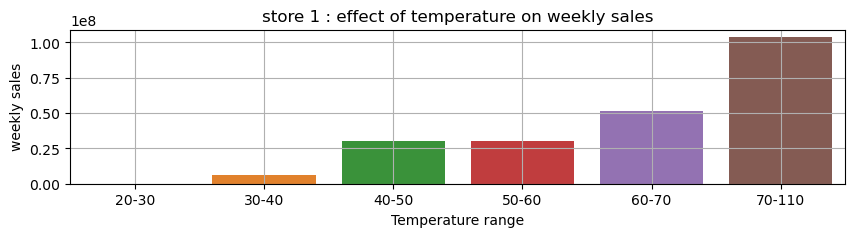

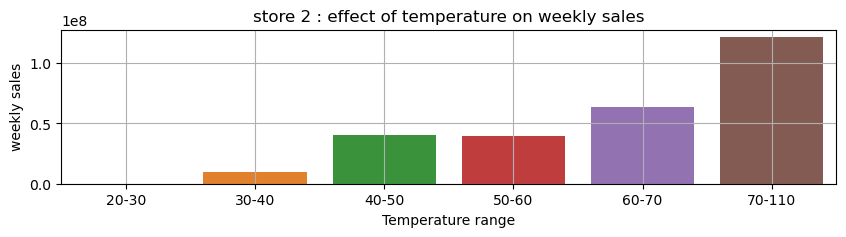

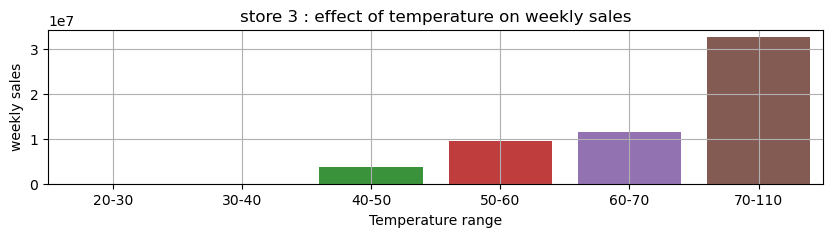

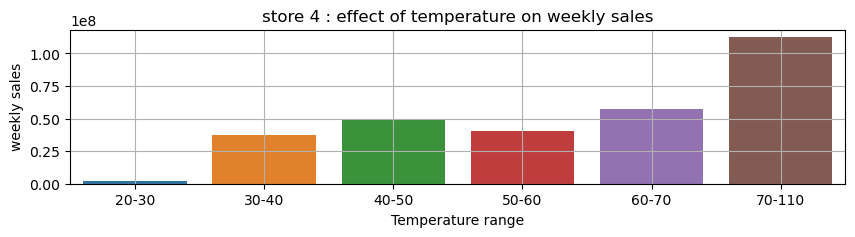

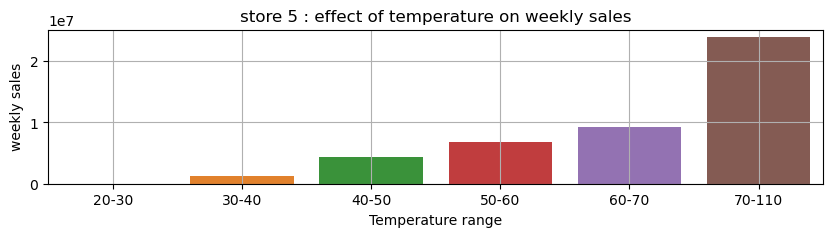

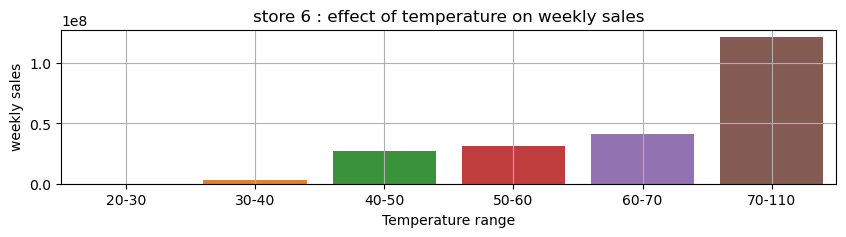

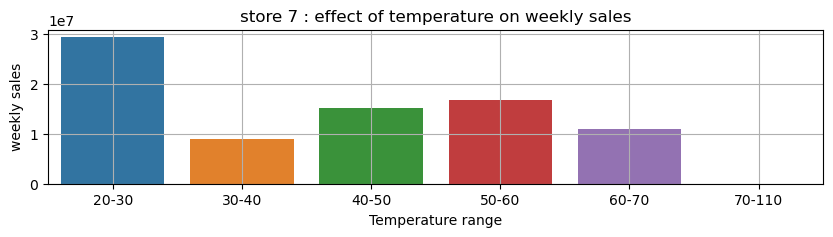

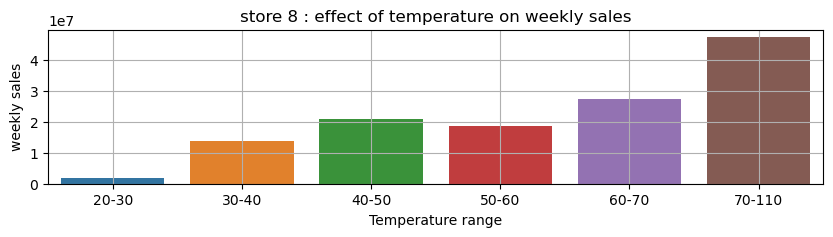

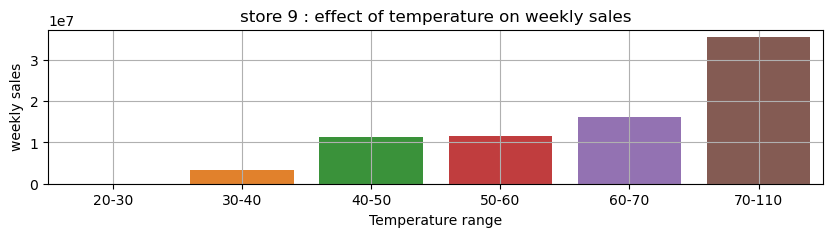

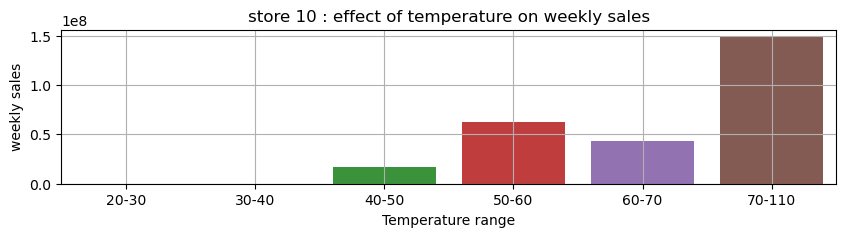

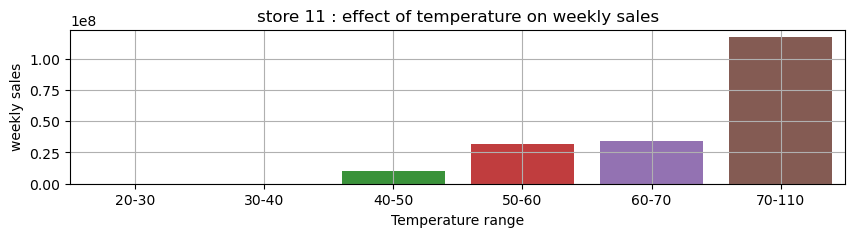

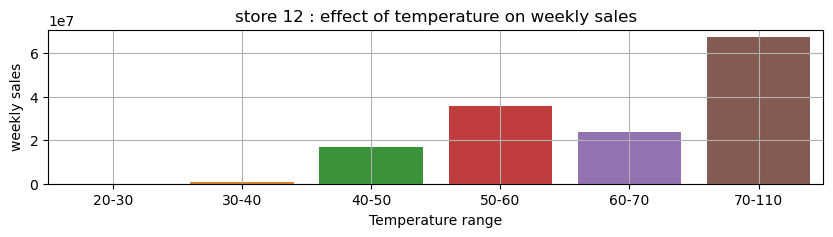

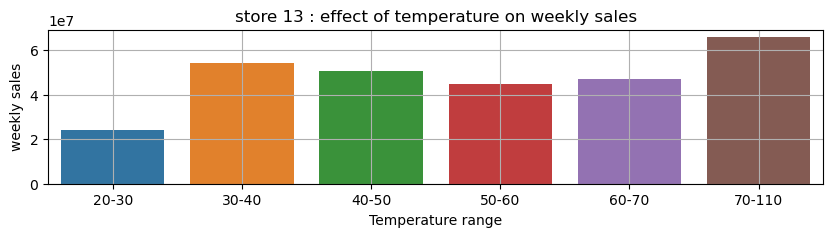

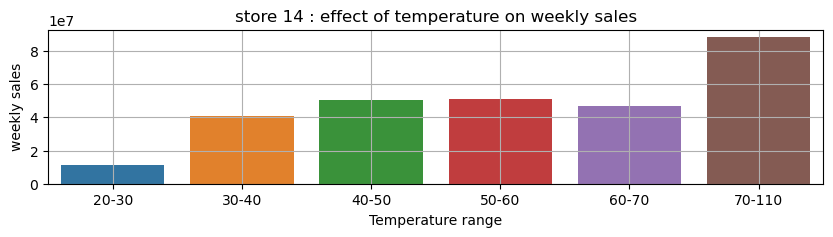

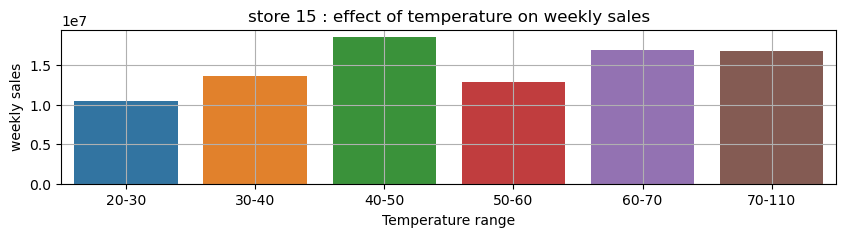

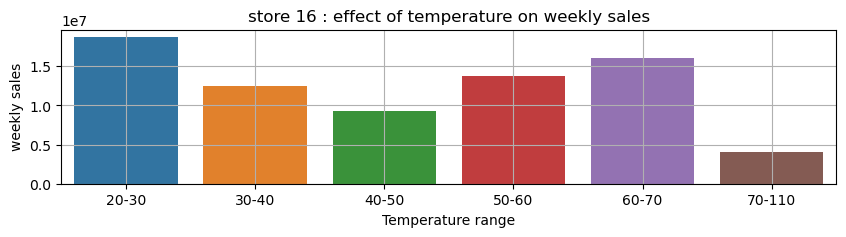

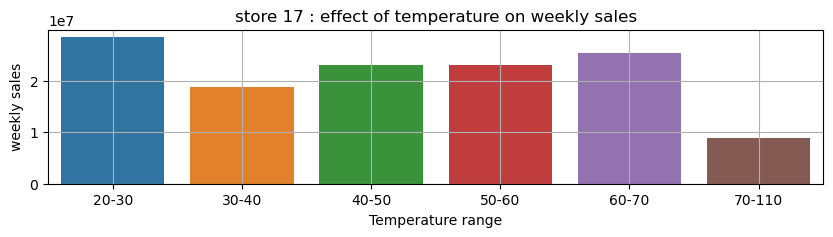

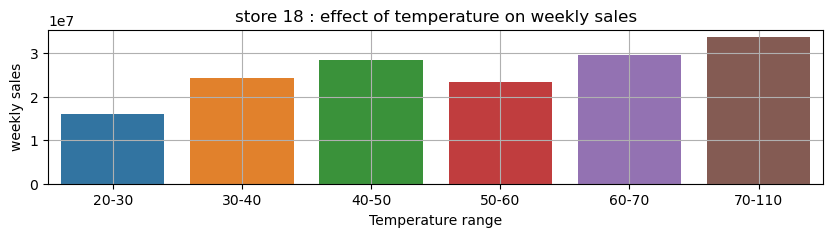

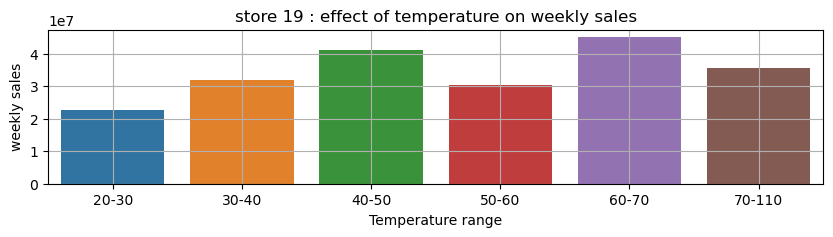

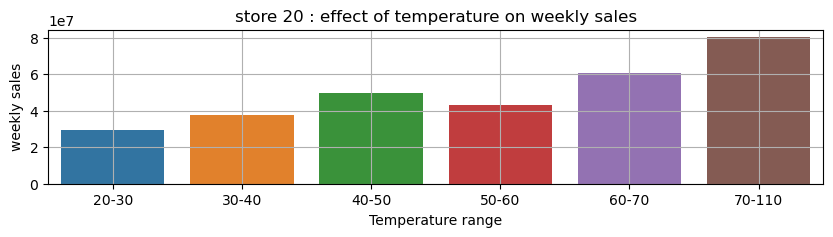

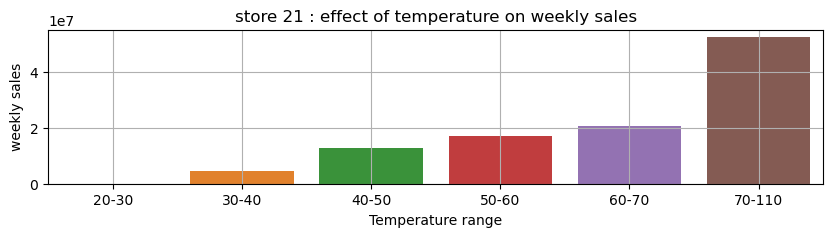

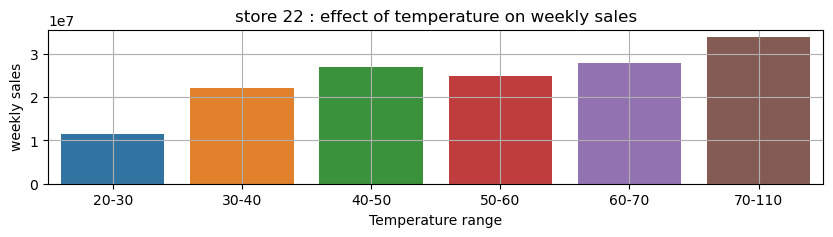

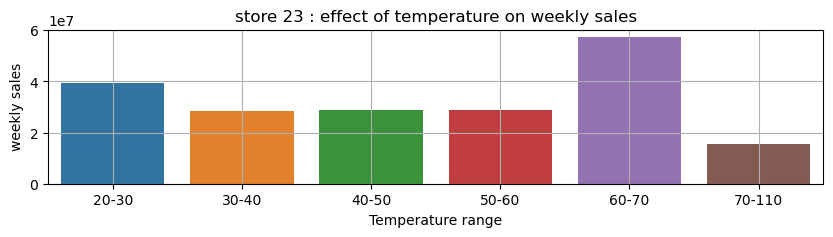

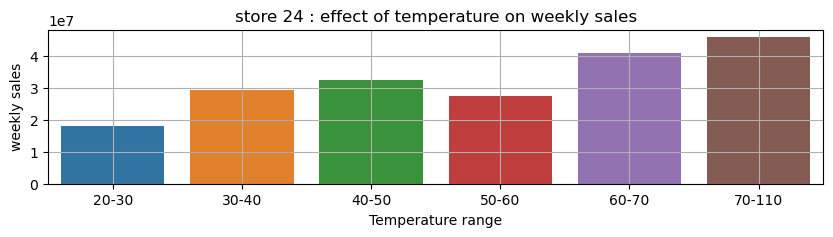

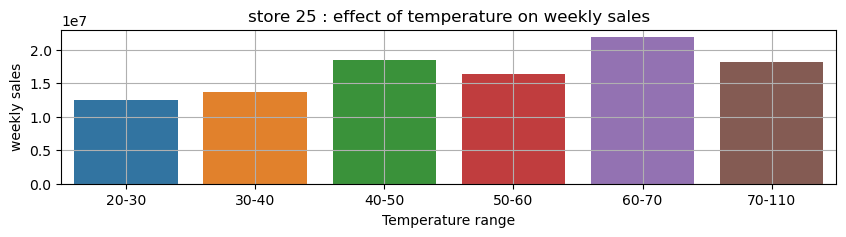

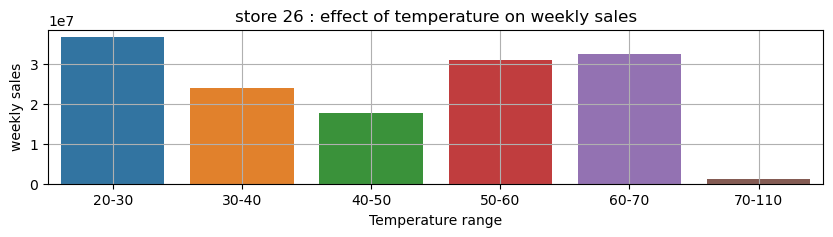

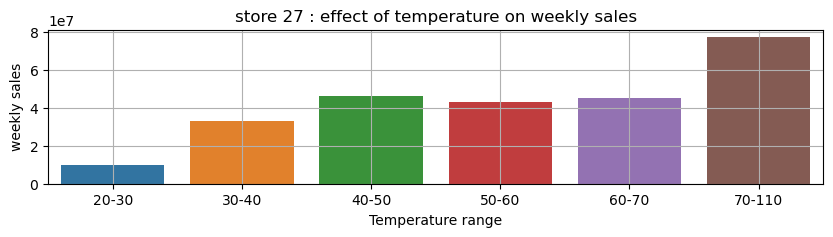

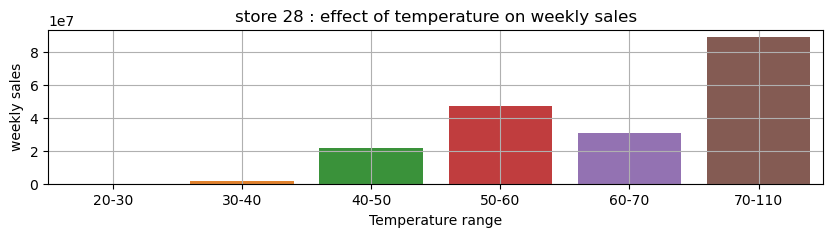

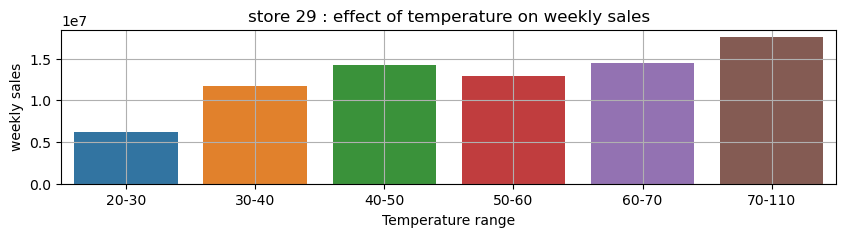

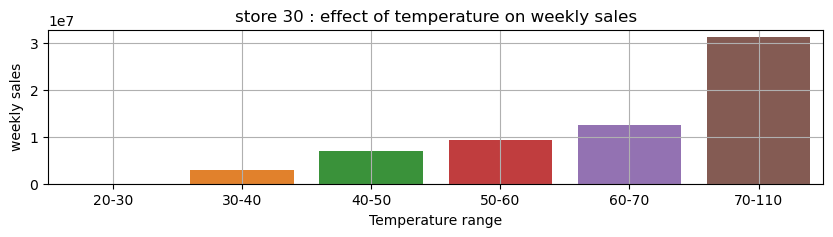

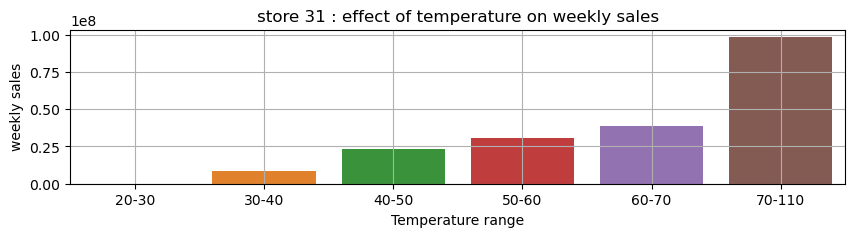

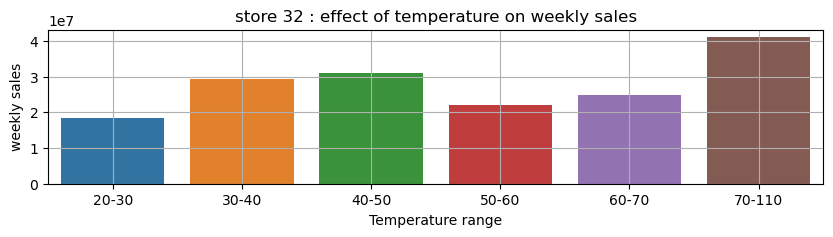

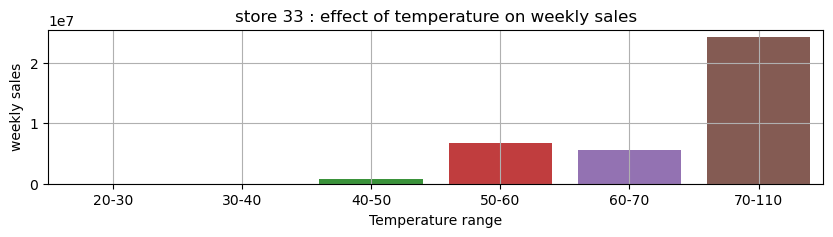

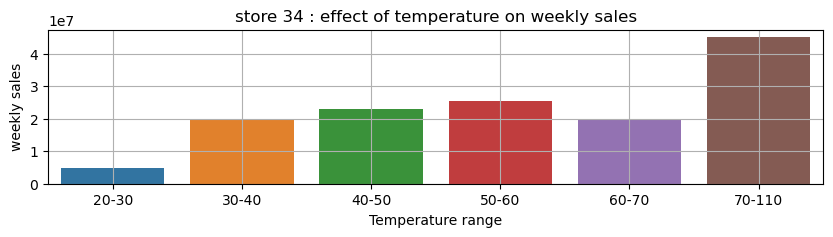

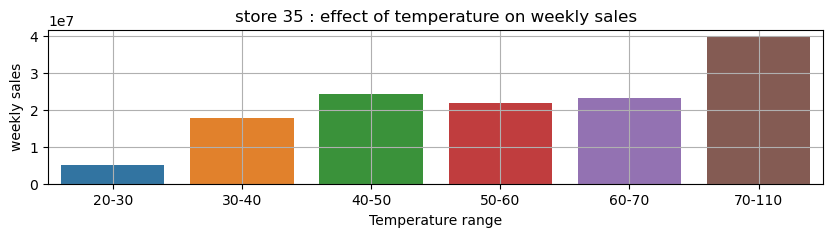

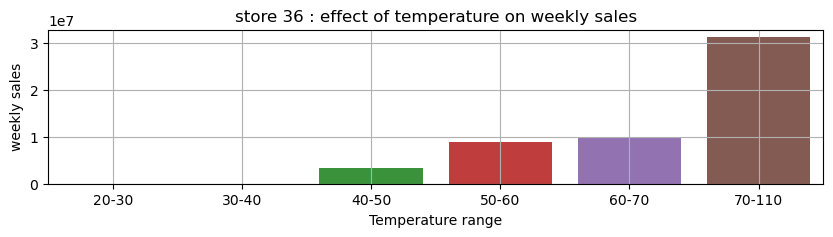

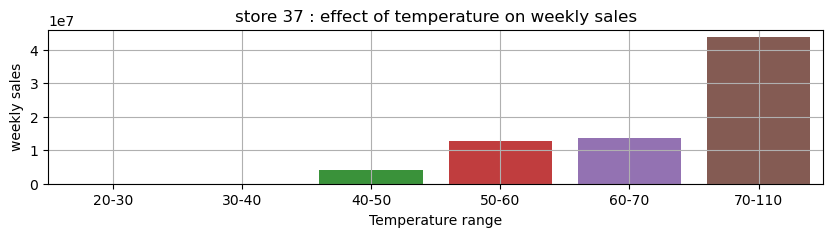

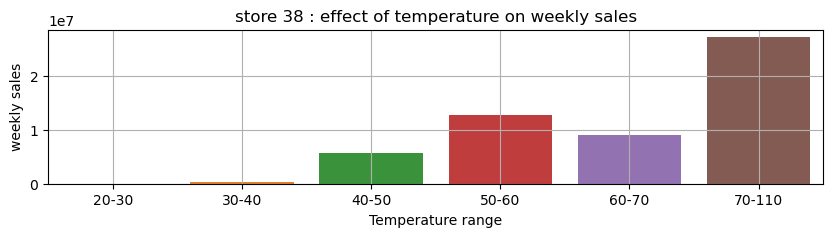

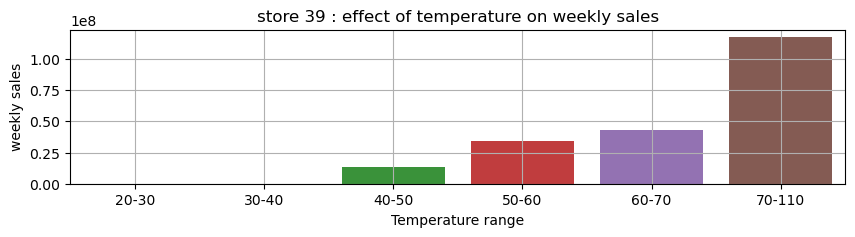

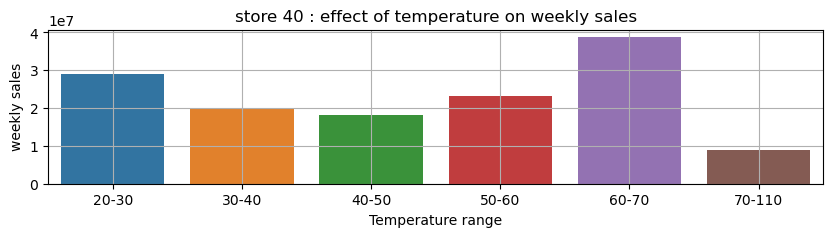

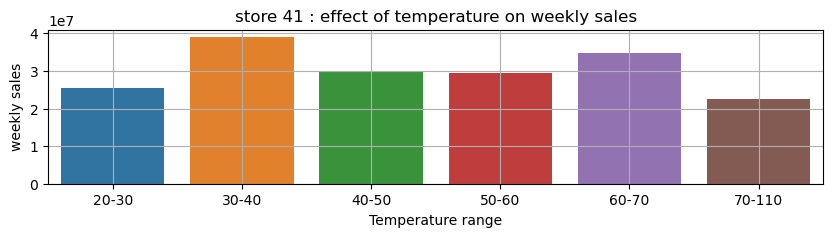

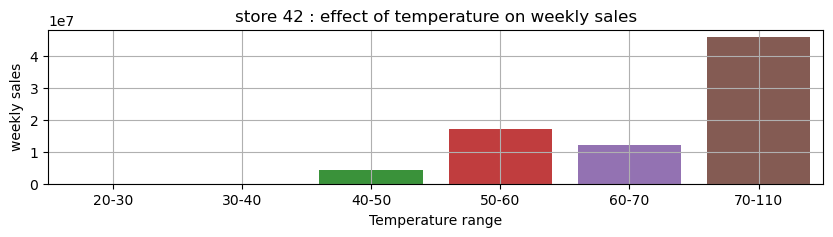

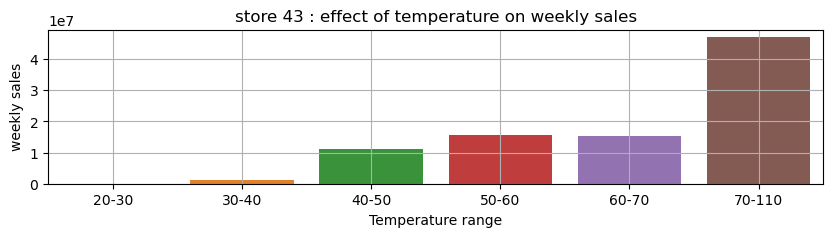

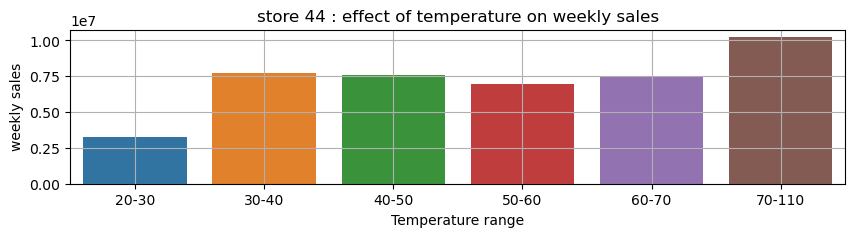

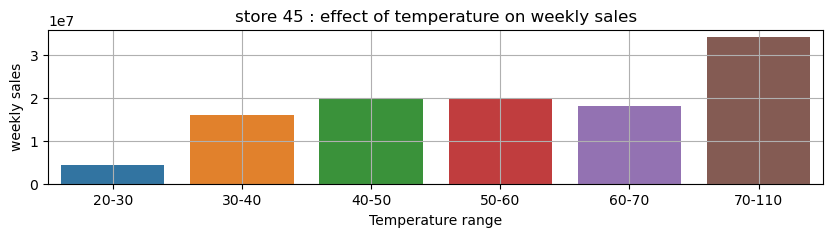

In [25]:


for i in store_list:
    x_store = get_store_df(walmart_df,'Store',i)
    x_store = x_store[['Store','Temperature','Weekly_Sales']].sort_values('Temperature')
    x_store['Temperature']= pd.cut(x_store['Temperature'],bins = [0,30,40,50,60,70,110],
                                   labels =['20-30','30-40','40-50','50-60','60-70','70-110'])
    x_store = x_store.groupby("Temperature")['Weekly_Sales'].sum().reset_index()
    
    fig,axes = plt.subplots(figsize=(10,2))
    sns.barplot(x=x_store.Temperature,y = x_store.Weekly_Sales)
    plt.xlabel("Temperature range")
    plt.ylabel("weekly sales")
    plt.title(f"store {i} : effect of temperature on weekly sales")
    plt.grid(True)
    plt.show()

In [26]:
def outlier_plot(xrange,l=5,w=2,wl=20,ww=10,hs=1.5):
    fig,axes = plt.subplots(l,w,figsize=(wl,ww))
    plt.subplots_adjust(hspace= hs)
    j=1
    for i in xrange:
        store_df= get_store_df(walmart_df,'Store',i)
        plt.subplot(l,w,j)
        sns.boxplot(x=store_df['Weekly_Sales'])
        plt.title(f"store {i}")
        j += 1

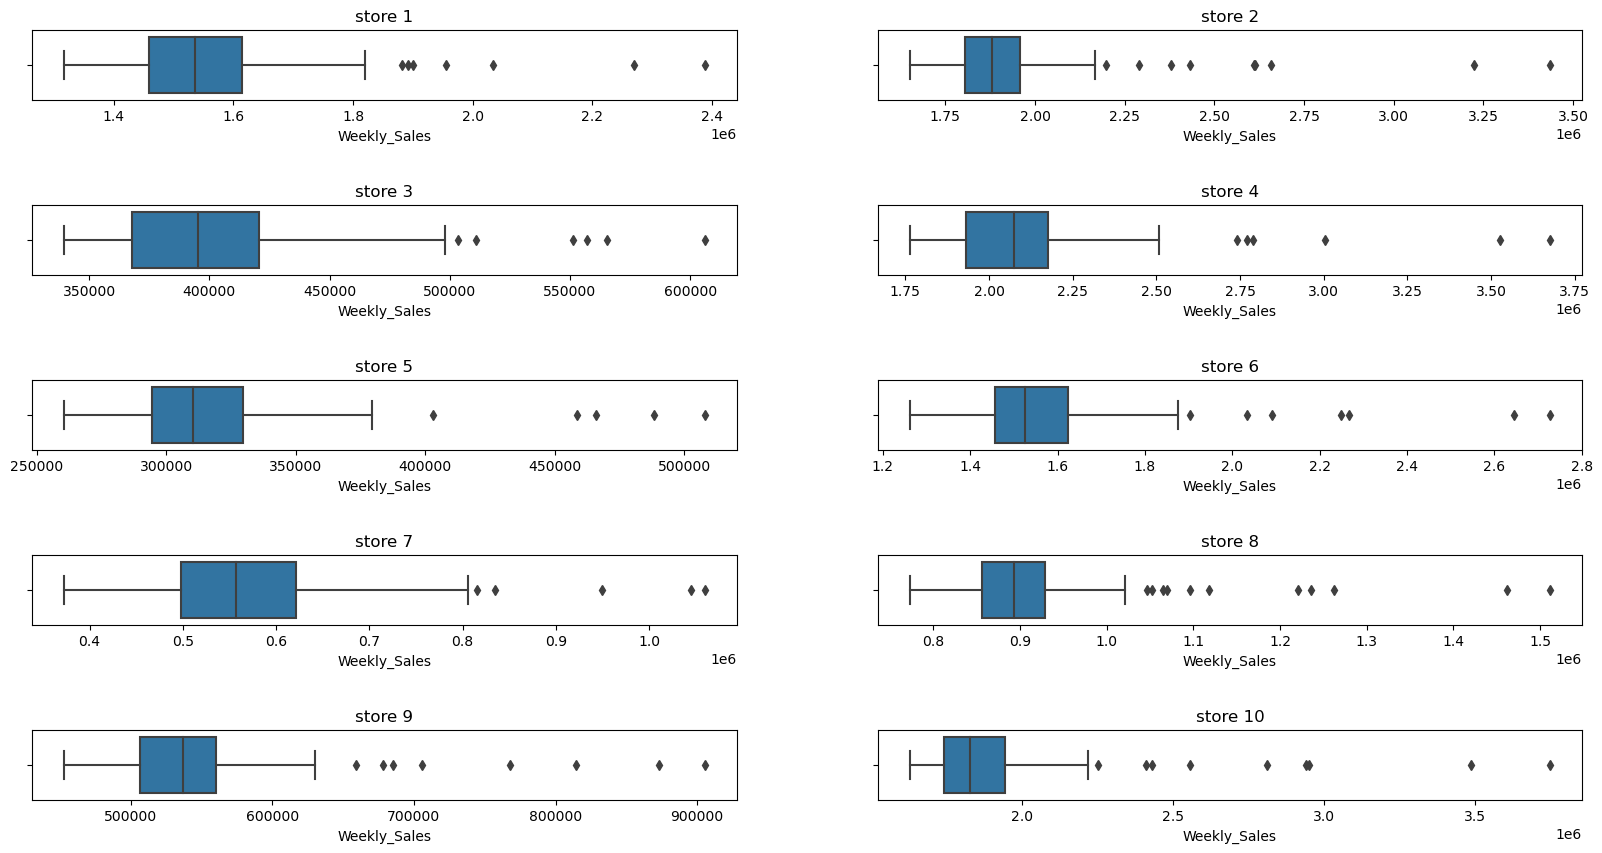

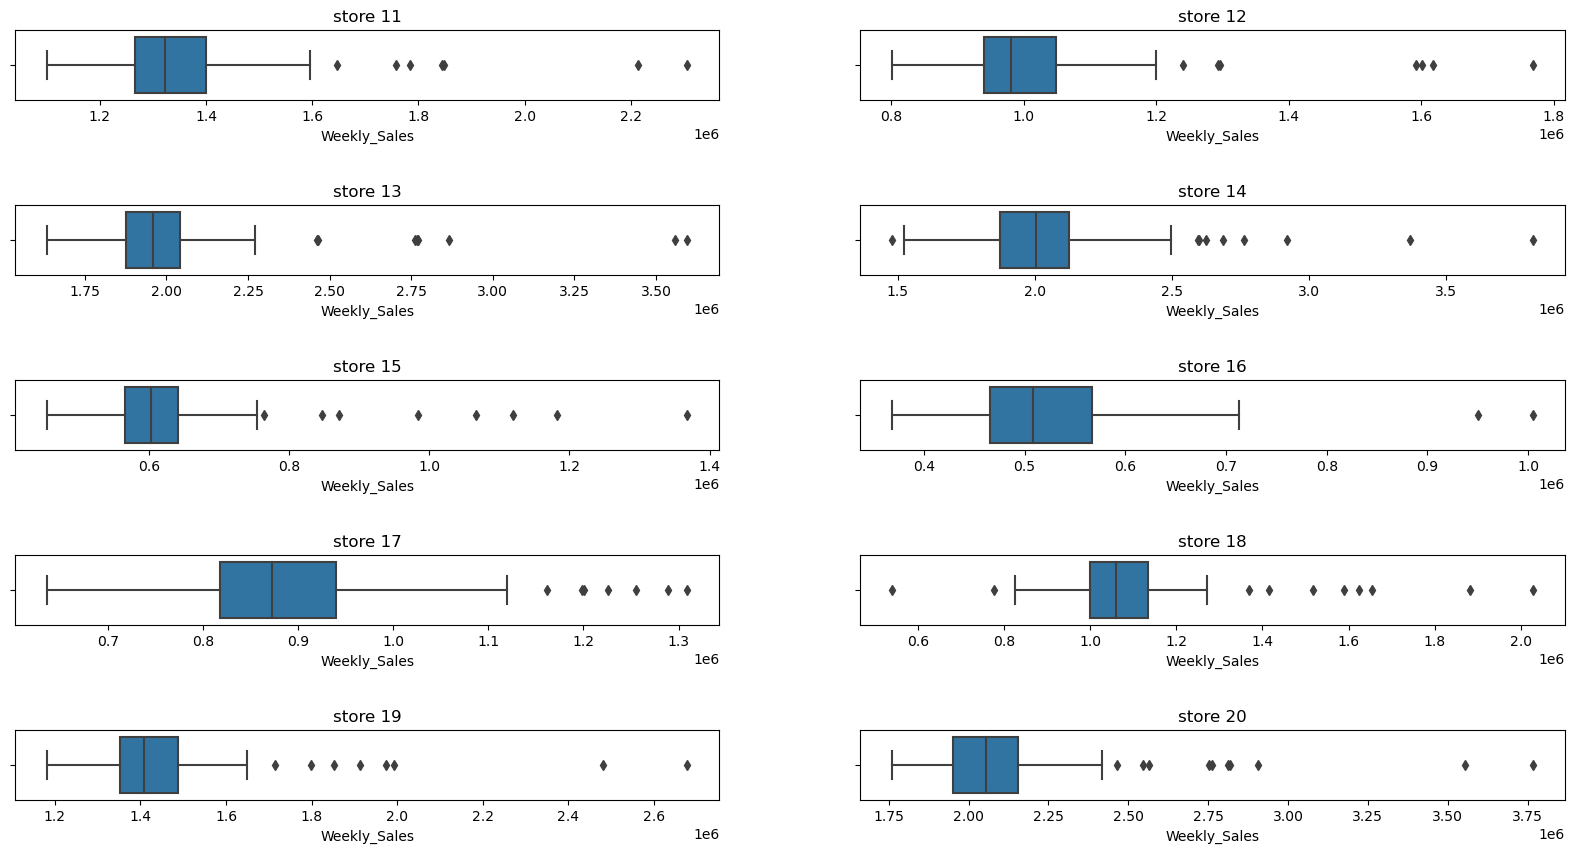

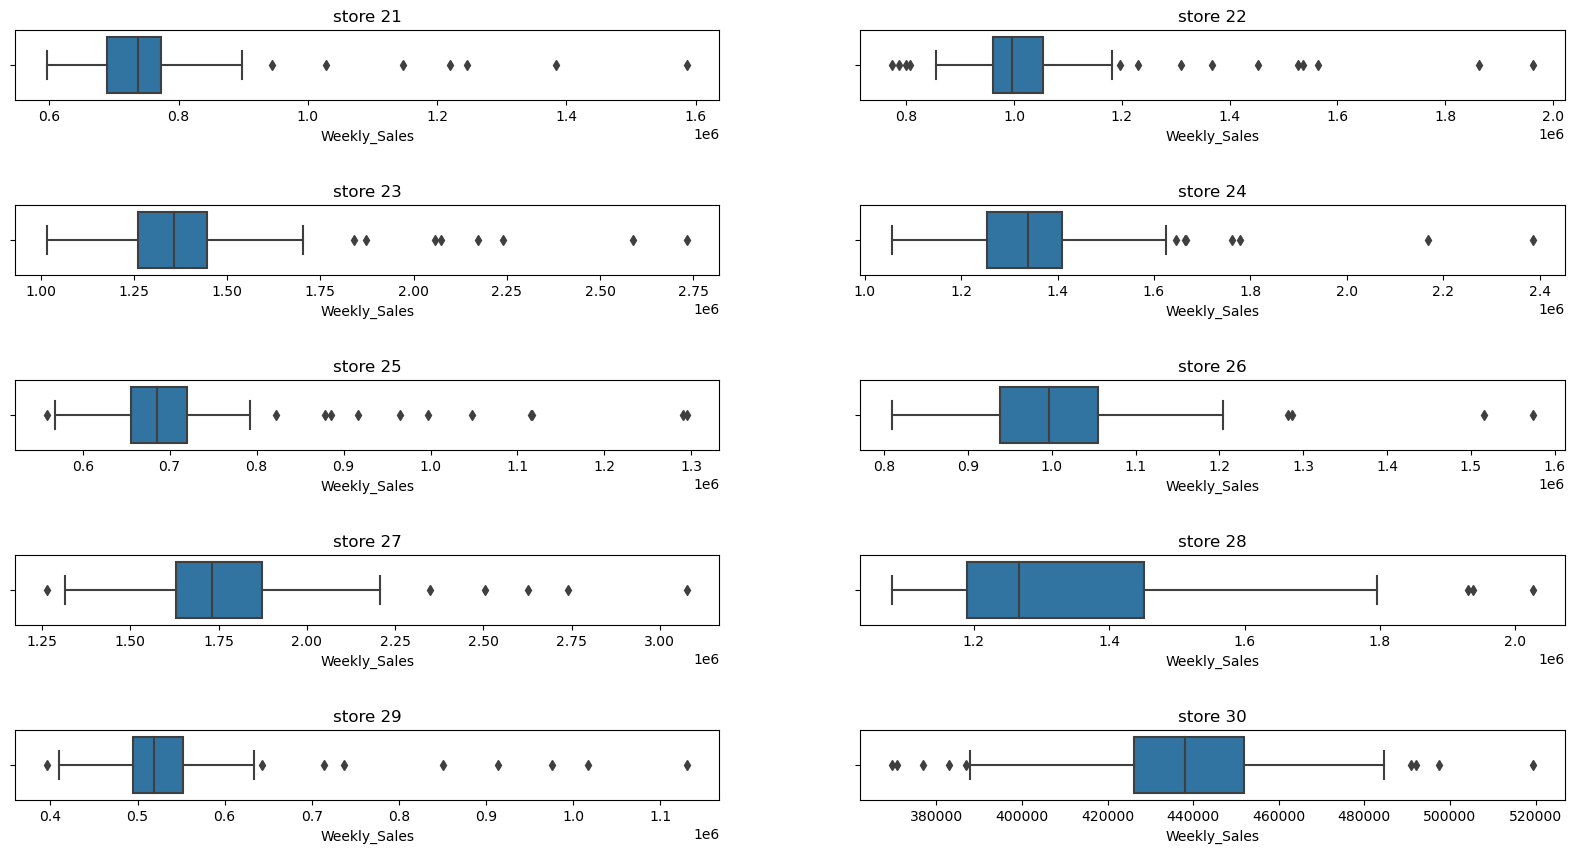

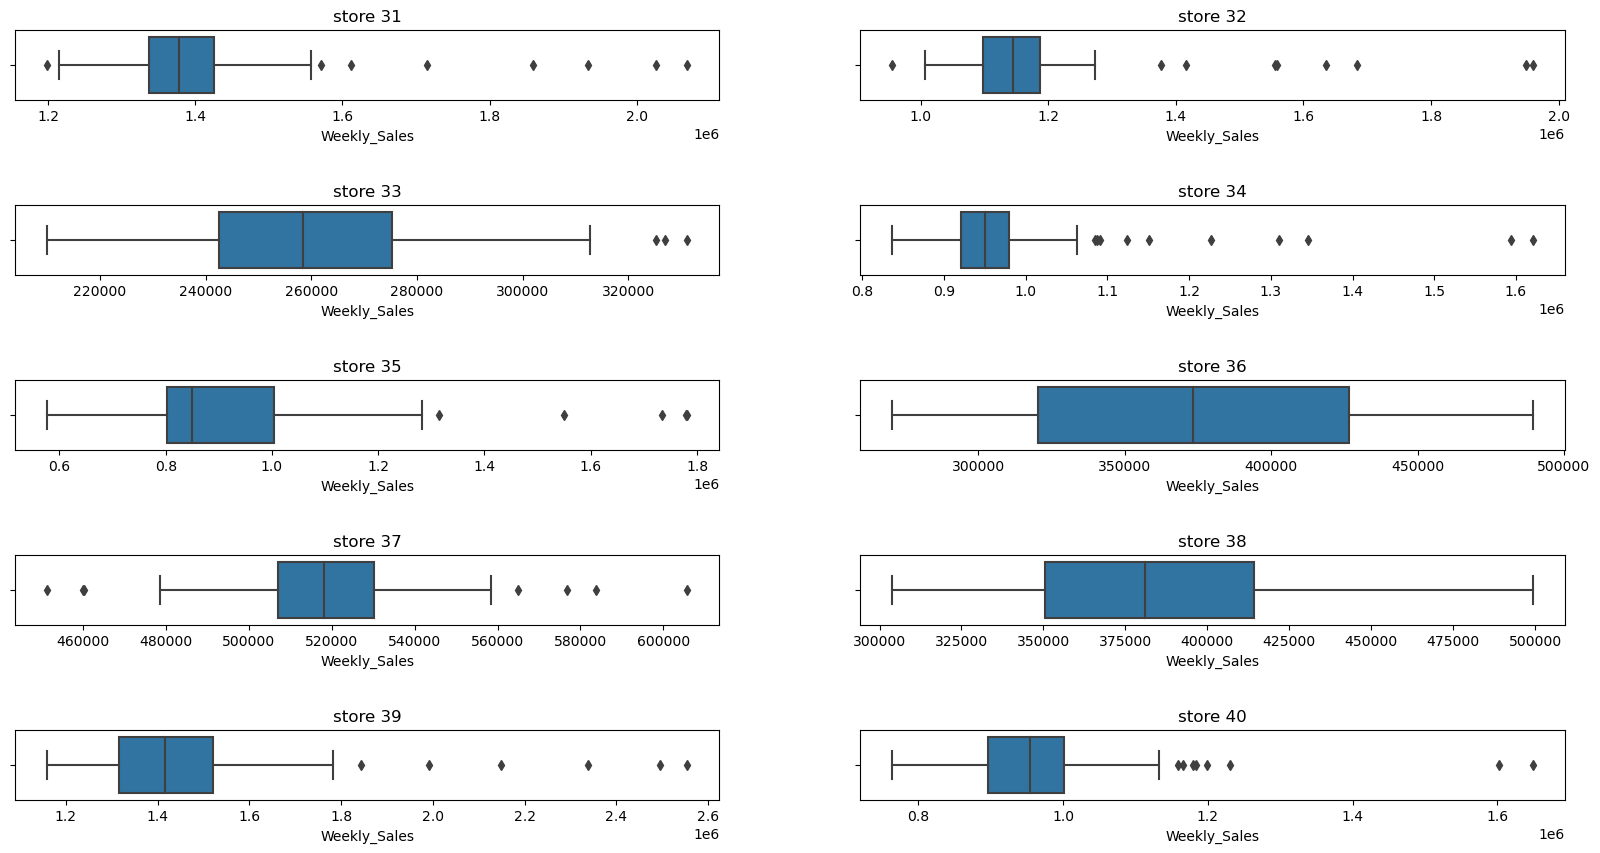

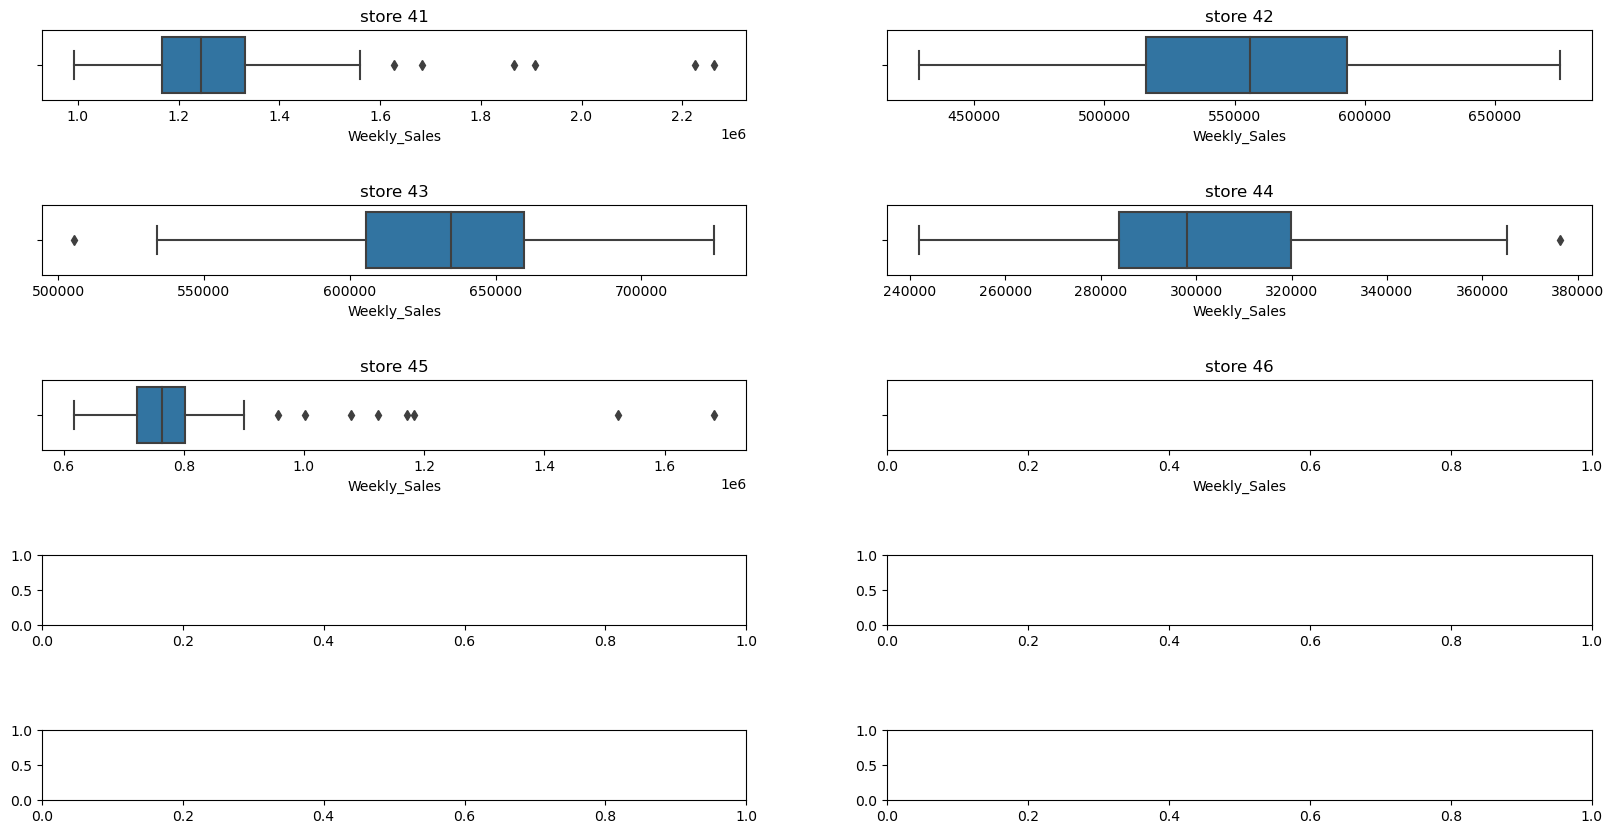

In [27]:
outlier_plot(range(1,11))
outlier_plot(range(11,21))
outlier_plot(range(21,31))
outlier_plot(range(31,41))
outlier_plot(range(41,47))

In [28]:
store_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [29]:
from statsmodels.tsa.stattools import adfuller
storex,storey = [],[]
p_valuex,p_valuey = [],[]
test_statx,test_staty = [],[]
found_p_value = False
for i in store_list:
    store_df = get_store_df(walmart_df,'Store',i)
    adf=adfuller(store_df['Weekly_Sales'],autolag="AIC")
    values = [adf[0],adf[1],adf[2],adf[3],adf[4]["1%"],adf[4]['5%'],adf[4]['10%']]
    p_value = adf[1]
    test_stat=adf[0]
    if p_value >0.05:
        found_p_value
        storex.append(i)
        p_valuex.append(p_value)
        test_statx.append(test_stat)
    else:
        storey.append(i)
        p_valuey.append(p_value)
        test_staty.append(test_stat)
xstores= pd.DataFrame(zip(storex,p_valuex,test_statx),columns=['Store',"p_value","tess stats"])
ystores= pd.DataFrame(zip(storey,p_valuey,test_staty),columns=['Store',"p_value","tess stats"])
print(f"\n non stationary stores:\n         test results for p values greater than 0.05\n {xstores}")
print(f"\n  stationary stores:\n         test results for p values less than 0.05\n {ystores}")


 non stationary stores:
         test results for p values greater than 0.05
    Store   p_value  tess stats
0     14  0.067870   -2.736887
1     30  0.168364   -2.311254
2     36  0.973016    0.213632
3     38  0.916563   -0.360017
4     42  0.457285   -1.649531
5     43  0.106059   -2.539930
6     44  0.759162   -0.983703

  stationary stores:
         test results for p values less than 0.05
     Store       p_value  tess stats
0       1  1.387779e-05   -5.102186
1       2  3.990207e-03   -3.708863
2       3  3.840926e-02   -2.963868
3       4  4.779866e-02   -2.879382
4       5  4.251706e-04   -4.310974
5       6  2.159486e-06   -5.492502
6       7  2.170072e-04   -4.476254
7       8  1.002746e-06   -5.647653
8       9  2.134309e-05   -5.008564
9      10  8.763068e-06   -5.200703
10     11  3.316837e-03   -3.762354
11     12  1.045184e-06   -5.639346
12     13  2.056446e-06   -5.502482
13     15  1.510016e-06   -5.565232
14     16  1.766067e-04   -4.525758
15     17  5.679177e-06 

7 stores have (14,30,36,38,42,43,44) p value greater than 0.05

In [30]:
highest_weekly_sales = walmart_df.groupby(['Store'])["Weekly_Sales"].sum().reset_index().sort_values("Weekly_Sales",ascending= False)
highest_weekly_sales.head()

Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

In [31]:
stationary_stores =highest_weekly_sales['Store'].tolist()
print(stationary_stores)

[20, 4, 14, 13, 2, 10, 27, 6, 1, 39, 19, 31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, 40, 35, 8, 17, 45, 21, 25, 43, 15, 7, 42, 9, 29, 16, 37, 30, 3, 38, 36, 5, 44, 33]


In [32]:
high_5= stationary_stores[0:5]
high_10= stationary_stores[0:10]
high_12= stationary_stores[0:12]


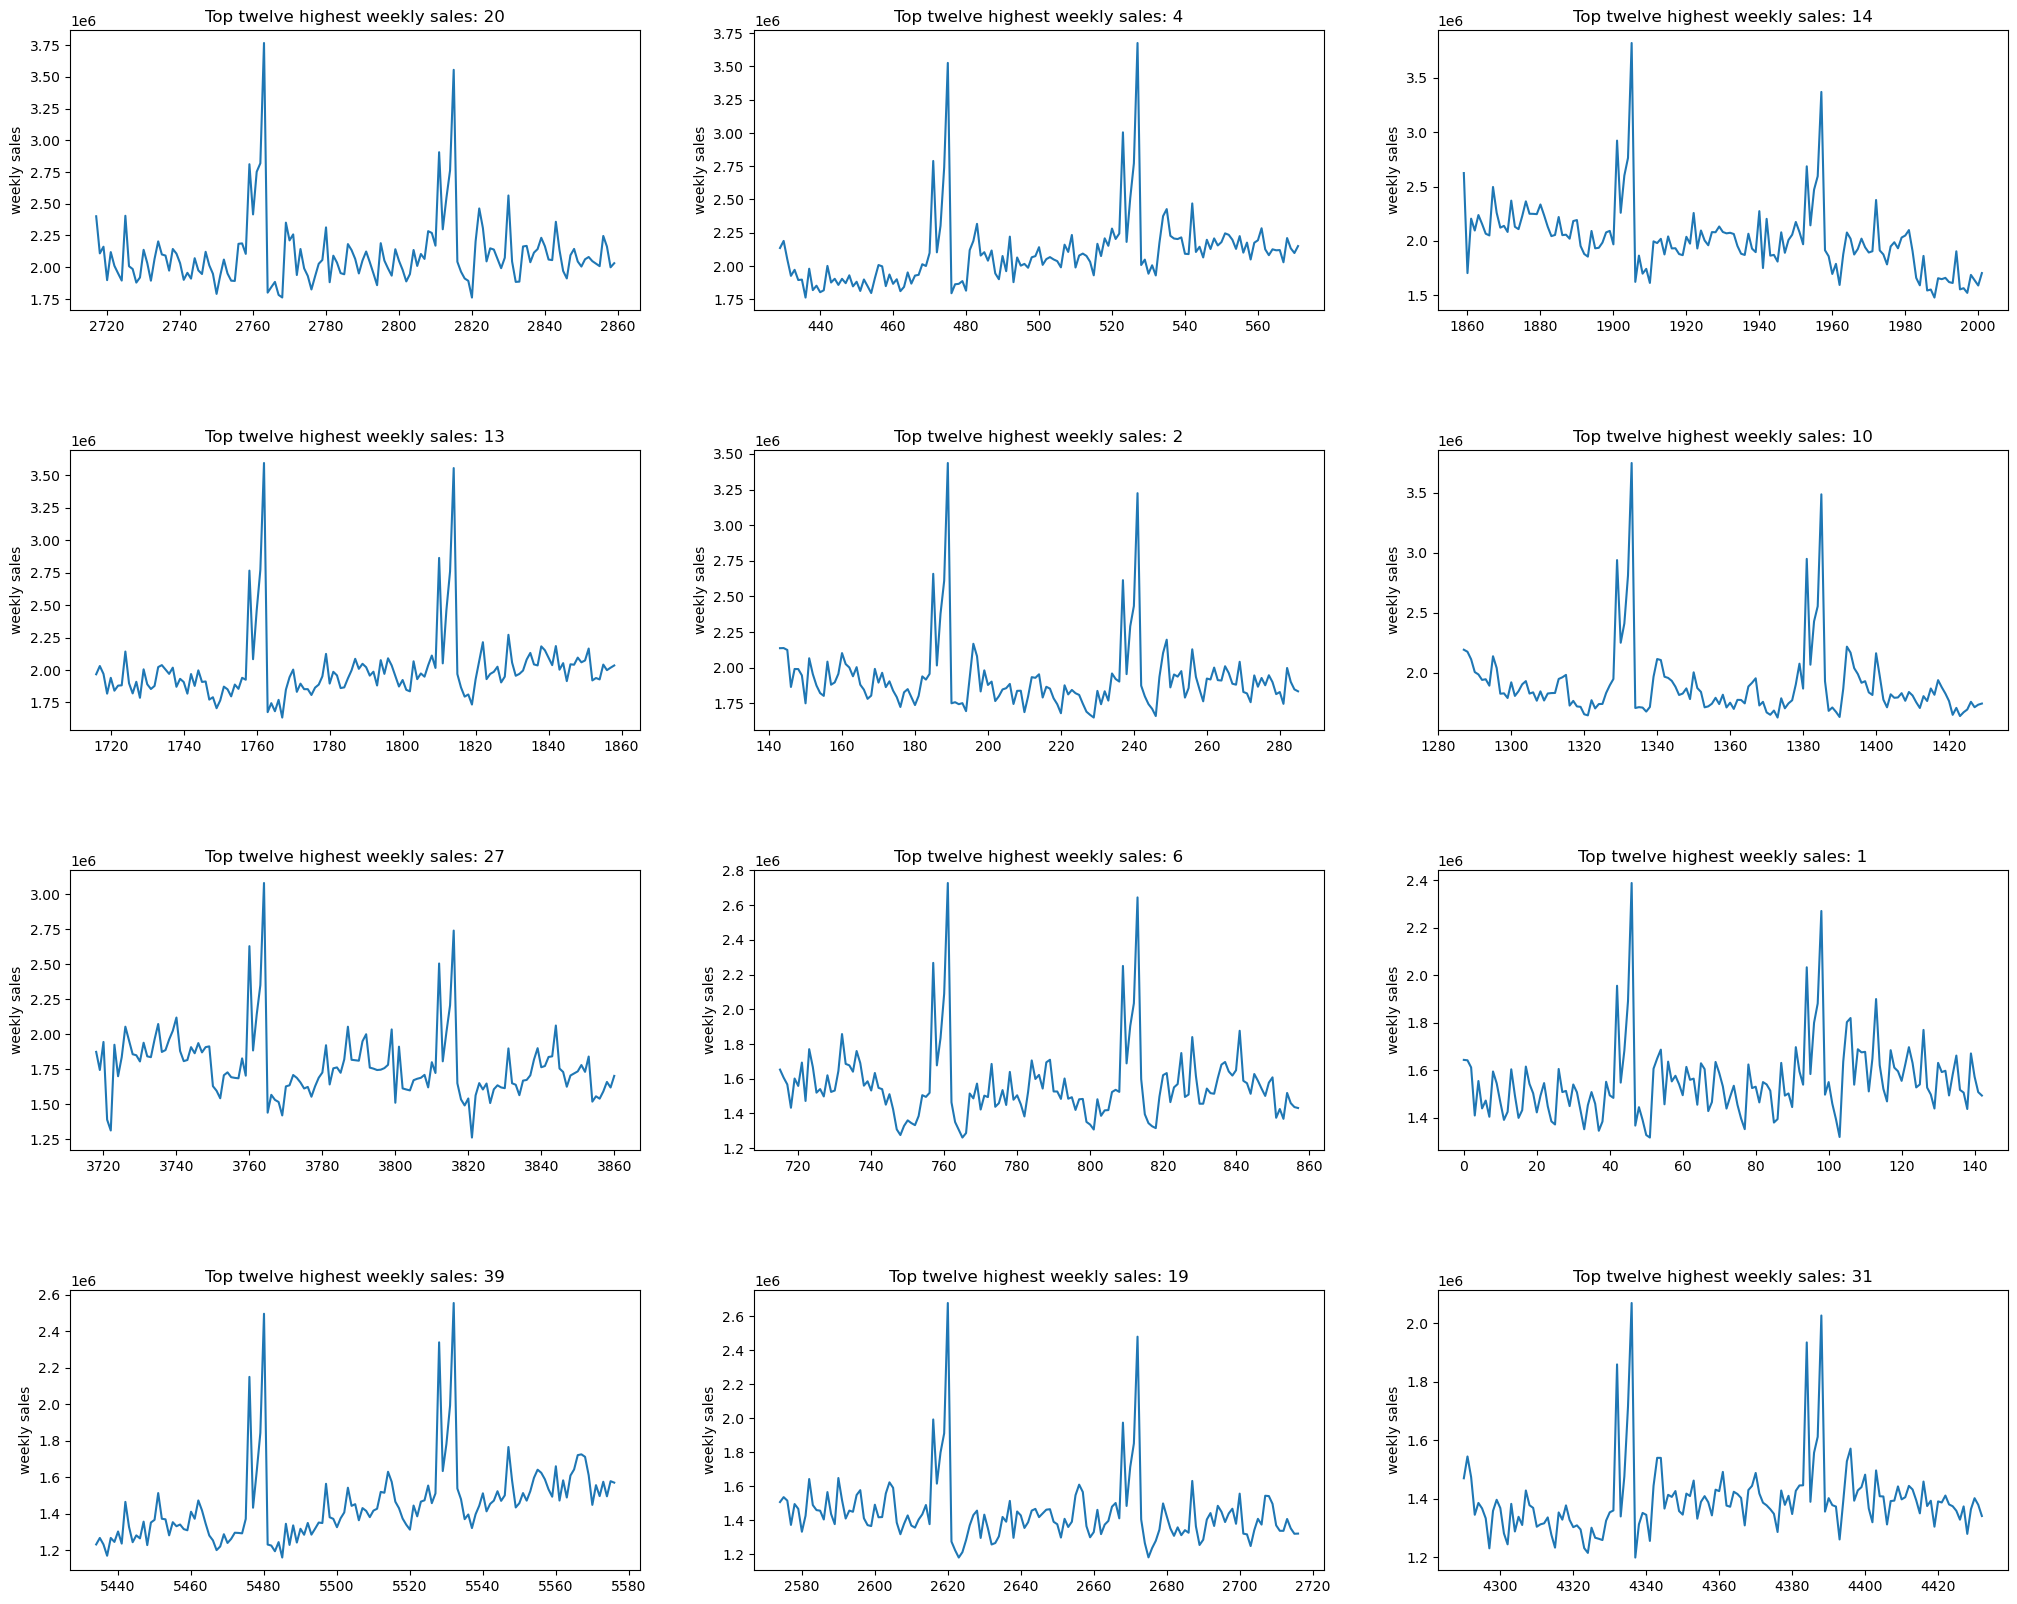

In [33]:

def plot_top_twelve_weeklysales():

    fig, axes = plt.subplots(4,3,figsize=(25,20))
    plt.subplots_adjust(hspace=0.5)
    j=1

    for i in high_12:
        store_df = get_store_df(walmart_df,'Store',i)
        plt.subplot(4,3,j)
        store_df['Weekly_Sales'].plot();
        plt.title("Top twelve highest weekly sales: " + str(i))
        plt.ylabel("weekly sales")
        j +=1
plot_top_twelve_weeklysales()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
for i in high_12:
    print(f"highest weekly sales: Best order for ARIMA model for store = {i}")
    store_df = get_store_df(walmart_df,'Store',i)
    multiplemodels= auto_arima(store_df["Weekly_Sales"],trace = True)

highest weekly sales: Best order for ARIMA model for store = 20
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3974.854, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3991.763, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3971.424, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3977.707, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.703, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3972.263, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3972.813, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3974.255, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.935 seconds
highest weekly sales: Best order for ARIMA model for store = 4
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3941.121, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3974.839, Tim

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

In [35]:
def get_predictions(date,actual,predicted):
    predicted_dbf = pd.DataFrame(zip(date,actual,predicted),columns = ['Date','actual','predicted'])
    predicted_dbf['error(%)'] = abs(predicted_dbf.actual-predicted_dbf.predicted)*100/predicted_dbf.actual
    predict_dbf = predicted_dbf.sort_values(by =['error(%)']).reset_index()
    del predict_dbf['index']
    
    print("\n-------------predicted results-------------")
    print(predicted_dbf.head(),"\n------------------------------")
    print(f"median error: {round(predict_dbf['error(%)'].median(),2)}")
    print(f"mean error: {round(predict_dbf['error(%)'].mean(),2)}")
    print("----------------------------------------------------\n")
    
    return (predict_dbf)
    

In [36]:
store_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

In [37]:
ARIMA_order =[[2,1,3],[1,0,0],[2,0,0],[5,1,1]]
predictions = list()
arima_xtrain,arima_xtest = [],[]
test_index_list=[]
train_index_list=[]
for i in high_12:
    store_df = get_store_df(walmart_df,'Store',i)
    size = int(store_df.shape[0]*0.80)
    train, test = store_df.iloc[:size,:],store_df.iloc[size:,:]
    arima_xtrain.append(train)
    arima_xtest.append(test)
    train_index = train.set_index('Date', inplace=True)
    test_index = test.set_index('Date', inplace=True)
    arima_test_index = test_index
    arima_train_index = train_index
    start_1 = train.shape[0]
    end_1 = (train.shape[0] +  test.shape[0] )-1
    actual_1= test['Weekly_Sales']
    predict_index = actual_1.index
    actual_2 = actual_1.tolist()
    
    if i ==1 or i == 4:
        arima = ARIMA_order[0]
    elif i ==2 or i == 13 or i ==20:
        arima = ARIMA_order[1]
    elif i ==10 or i == 27:
        arima = ARIMA_order[2]
    elif i ==39:
        arima = ARIMA_order[1]
    print(f"\n results for store = {i}\n best arima order : {arima}")
    model= ARIMA(train['Weekly_Sales'],order = arima)
    model_fit = model.fit()
    print(model_fit.summary())
    predicted_1 = model_fit.predict(start = start_1, end = end_1)
    predicted_2 = pd.DataFrame()
    predicted_2['Weekly_Sales']=predicted_1
    predicted_2.index =predict_index
    test_index_list.append(test_index)
    train_index_list.append(train_index)
    #predictions.append(predicted_2.index)
    predictions.append(get_predictions(predicted_2.index,actual_2,predicted_1.tolist()))
arima_predict = predictions


 results for store = 20
 best arima order : [1, 0, 0]
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1591.241
Date:                Sat, 02 Dec 2023   AIC                           3188.483
Time:                        01:37:48   BIC                           3196.692
Sample:                             0   HQIC                          3191.814
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.115e+06   5.73e+04     36.909      0.000       2e+06    2.23e+06
ar.L1          0.3927      0.046      8.558      0.000       0.303       0.4

C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_m

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1572.056
Date:                Sat, 02 Dec 2023   AIC                           3156.112
Time:                        01:37:48   BIC                           3172.476
Sample:                             0   HQIC                          3162.752
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7881      0.188     -4.184      0.000      -1.157      -0.419
ar.L2         -0.3304      0.199     -1.659      0.097      -0.721       0.060
ma.L1          0.3340      0.174      1.914      0.0

C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\bas

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1584.692
Date:                Sat, 02 Dec 2023   AIC                           3181.383
Time:                        01:37:49   BIC                           3197.748
Sample:                             0   HQIC                          3188.024
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5710      0.429     -3.660      0.000      -2.412      -0.730
ar.L2         -0.6993      0.401     -1.743      0.081      -1.486       0.087
ma.L1          1.0840      0.445      2.434      0.0

C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\bas

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1573.994
Date:                Sat, 02 Dec 2023   AIC                           3155.987
Time:                        01:37:49   BIC                           3166.932
Sample:                             0   HQIC                          3160.429
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.791e+06   5.01e+04     35.770      0.000    1.69e+06    1.89e+06
ar.L1          0.2891      0.057      5.052      0.000       0.177       0.401
ar.L2          0.1587      0.090      1.766      0.0

C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\bas

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1519.892
Date:                Sat, 02 Dec 2023   AIC                           3051.783
Time:                        01:37:50   BIC                           3068.147
Sample:                             0   HQIC                          3058.424
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7400      0.163     -4.539      0.000      -1.060      -0.421
ar.L2         -0.2902      0.159     -1.829      0.067      -0.601       0.021
ma.L1          0.3069      0.158      1.946      0.0

C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\n_users\jyothi\lib\site-packages\statsmodels\tsa\bas


-------------predicted results-------------
        Date      actual     predicted  error(%)
0 2012-04-13  1407842.91  1.425254e+06  1.236694
1 2012-04-20  1407036.59  1.406407e+06  0.044766
2 2012-04-27  1311352.25  1.401398e+06  6.866626
3 2012-04-05  1391257.28  1.400067e+06  0.633202
4 2012-11-05  1392938.06  1.399713e+06  0.486376 
------------------------------
median error: 1.84
mean error: 2.41
----------------------------------------------------



In [38]:
predictions

[         Date      actual     predicted   error(%)
 0  2012-05-25  2114989.00  2.115621e+06   0.029899
 1  2012-07-13  2134680.12  2.114974e+06   0.923133
 2  2012-03-08  2094515.71  2.114973e+06   0.976722
 3  2012-01-06  2143126.59  2.115228e+06   1.301783
 4  2012-10-08  2144245.39  2.114973e+06   1.365148
 5  2012-07-09  2080529.06  2.114973e+06   1.655550
 6  2012-04-05  2163510.89  2.125678e+06   1.748681
 7  2012-12-10  2162951.36  2.114973e+06   2.218178
 8  2012-11-05  2168097.11  2.119177e+06   2.256379
 9  2012-06-15  2165160.29  2.115012e+06   2.316124
 10 2012-08-31  2062481.56  2.114973e+06   2.545075
 11 2012-06-22  2060588.69  2.114989e+06   2.640021
 12 2012-06-29  2055952.61  2.114979e+06   2.871014
 13 2012-09-14  2047949.98  2.114973e+06   3.272701
 14 2012-08-17  2045061.22  2.114973e+06   3.418579
 15 2012-05-18  2039222.26  2.116624e+06   3.795639
 16 2012-10-26  2031650.55  2.114973e+06   4.101232
 17 2012-09-21  2028587.24  2.114973e+06   4.258432
 18 2012-08-

In [39]:
arima_predict

[         Date      actual     predicted   error(%)
 0  2012-05-25  2114989.00  2.115621e+06   0.029899
 1  2012-07-13  2134680.12  2.114974e+06   0.923133
 2  2012-03-08  2094515.71  2.114973e+06   0.976722
 3  2012-01-06  2143126.59  2.115228e+06   1.301783
 4  2012-10-08  2144245.39  2.114973e+06   1.365148
 5  2012-07-09  2080529.06  2.114973e+06   1.655550
 6  2012-04-05  2163510.89  2.125678e+06   1.748681
 7  2012-12-10  2162951.36  2.114973e+06   2.218178
 8  2012-11-05  2168097.11  2.119177e+06   2.256379
 9  2012-06-15  2165160.29  2.115012e+06   2.316124
 10 2012-08-31  2062481.56  2.114973e+06   2.545075
 11 2012-06-22  2060588.69  2.114989e+06   2.640021
 12 2012-06-29  2055952.61  2.114979e+06   2.871014
 13 2012-09-14  2047949.98  2.114973e+06   3.272701
 14 2012-08-17  2045061.22  2.114973e+06   3.418579
 15 2012-05-18  2039222.26  2.116624e+06   3.795639
 16 2012-10-26  2031650.55  2.114973e+06   4.101232
 17 2012-09-21  2028587.24  2.114973e+06   4.258432
 18 2012-08-

In [40]:
arima_xtest[0].head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-04-13     20    2045396.06             0        45.68       4.044   
2012-04-20     20    1884427.84             0        60.11       4.027   
2012-04-27     20    1886503.93             0        47.64       4.004   
2012-04-05     20    2163510.89             0        62.74       3.951   
2012-11-05     20    2168097.11             0        63.19       3.889   

                   CPI  Unemployment  Day  Month  Year  
Date                                                    
2012-04-13  214.312703         7.139   13      4  2012  
2012-04-20  214.367504         7.139   20      4  2012  
2012-04-27  214.422306         7.139   27      4  2012  
2012-04-05  214.477108         7.139    5      4  2012  
2012-11-05  214.531910         7.139    5     11  2012

In [41]:
arima_xtest[0].head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-04-13     20    2045396.06             0        45.68       4.044   
2012-04-20     20    1884427.84             0        60.11       4.027   
2012-04-27     20    1886503.93             0        47.64       4.004   
2012-04-05     20    2163510.89             0        62.74       3.951   
2012-11-05     20    2168097.11             0        63.19       3.889   

                   CPI  Unemployment  Day  Month  Year  
Date                                                    
2012-04-13  214.312703         7.139   13      4  2012  
2012-04-20  214.367504         7.139   20      4  2012  
2012-04-27  214.422306         7.139   27      4  2012  
2012-04-05  214.477108         7.139    5      4  2012  
2012-11-05  214.531910         7.139    5     11  2012

In [42]:
def plot_predictions(predictions,name,store_no):
    fig, axes = plt.subplots(figsize=(20,5))
    sns.lineplot(x =predictions.index, y =predictions['actual'],color = "blue",legend = True)
    sns.lineplot(x =predictions.index, y =predictions['predicted'],color = "red",legend = True)
    plt.title(f"store no :   {store_no} , {name}  predictions")
    plt.xlabel('Date')
    plt.ylabel('weekly sales')
    plt.legend
    plt.grid(True)
    plt.show
        

In [43]:
type(predictions)

list

In [44]:
predictions_array = np.array(predictions)

In [45]:
# Flatten the array
flattened_array = predictions_array.reshape(-1, predictions_array.shape[-1])

# Create DataFrame
predictions_df = pd.DataFrame(flattened_array, columns=["Date",'actual', 'predicted', 'error(%)'])
#predictions_df.set_index('Date', inplace=True)


# Display the DataFrame
print(predictions_df)
pred_df = predictions_df.copy()
pred_df.set_index('Date', inplace=True)
print(pred_df)
print(predictions_df)

          Date      actual       predicted  error(%)
0   2012-05-25   2114989.0  2115621.350325  0.029899
1   2012-07-13  2134680.12  2114974.185351  0.923133
2   2012-03-08  2094515.71  2114973.309019  0.976722
3   2012-01-06  2143126.59  2115227.737533  1.301783
4   2012-10-08  2144245.39   2114973.27472  1.365148
..         ...         ...             ...       ...
343 2012-10-26  1340232.55  1399584.920088  4.428513
344 2012-09-14  1327705.44  1399584.920088  5.413812
345 2012-04-27  1311352.25  1401397.900511  6.866626
346 2012-07-27  1303732.36  1399584.920148  7.352165
347 2012-09-28  1279080.58  1399584.920088  9.421169

[348 rows x 4 columns]
                actual       predicted  error(%)
Date                                            
2012-05-25   2114989.0  2115621.350325  0.029899
2012-07-13  2134680.12  2114974.185351  0.923133
2012-03-08  2094515.71  2114973.309019  0.976722
2012-01-06  2143126.59  2115227.737533  1.301783
2012-10-08  2144245.39   2114973.27472  1.3651

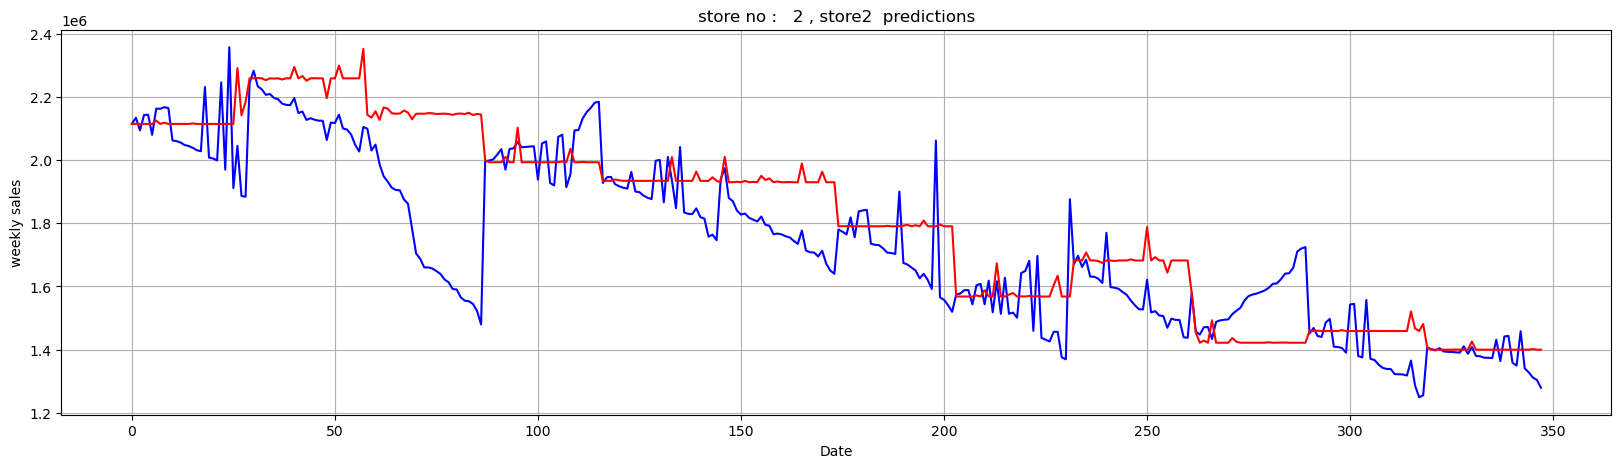

In [46]:
plot_predictions(predictions_df,"store2",2)

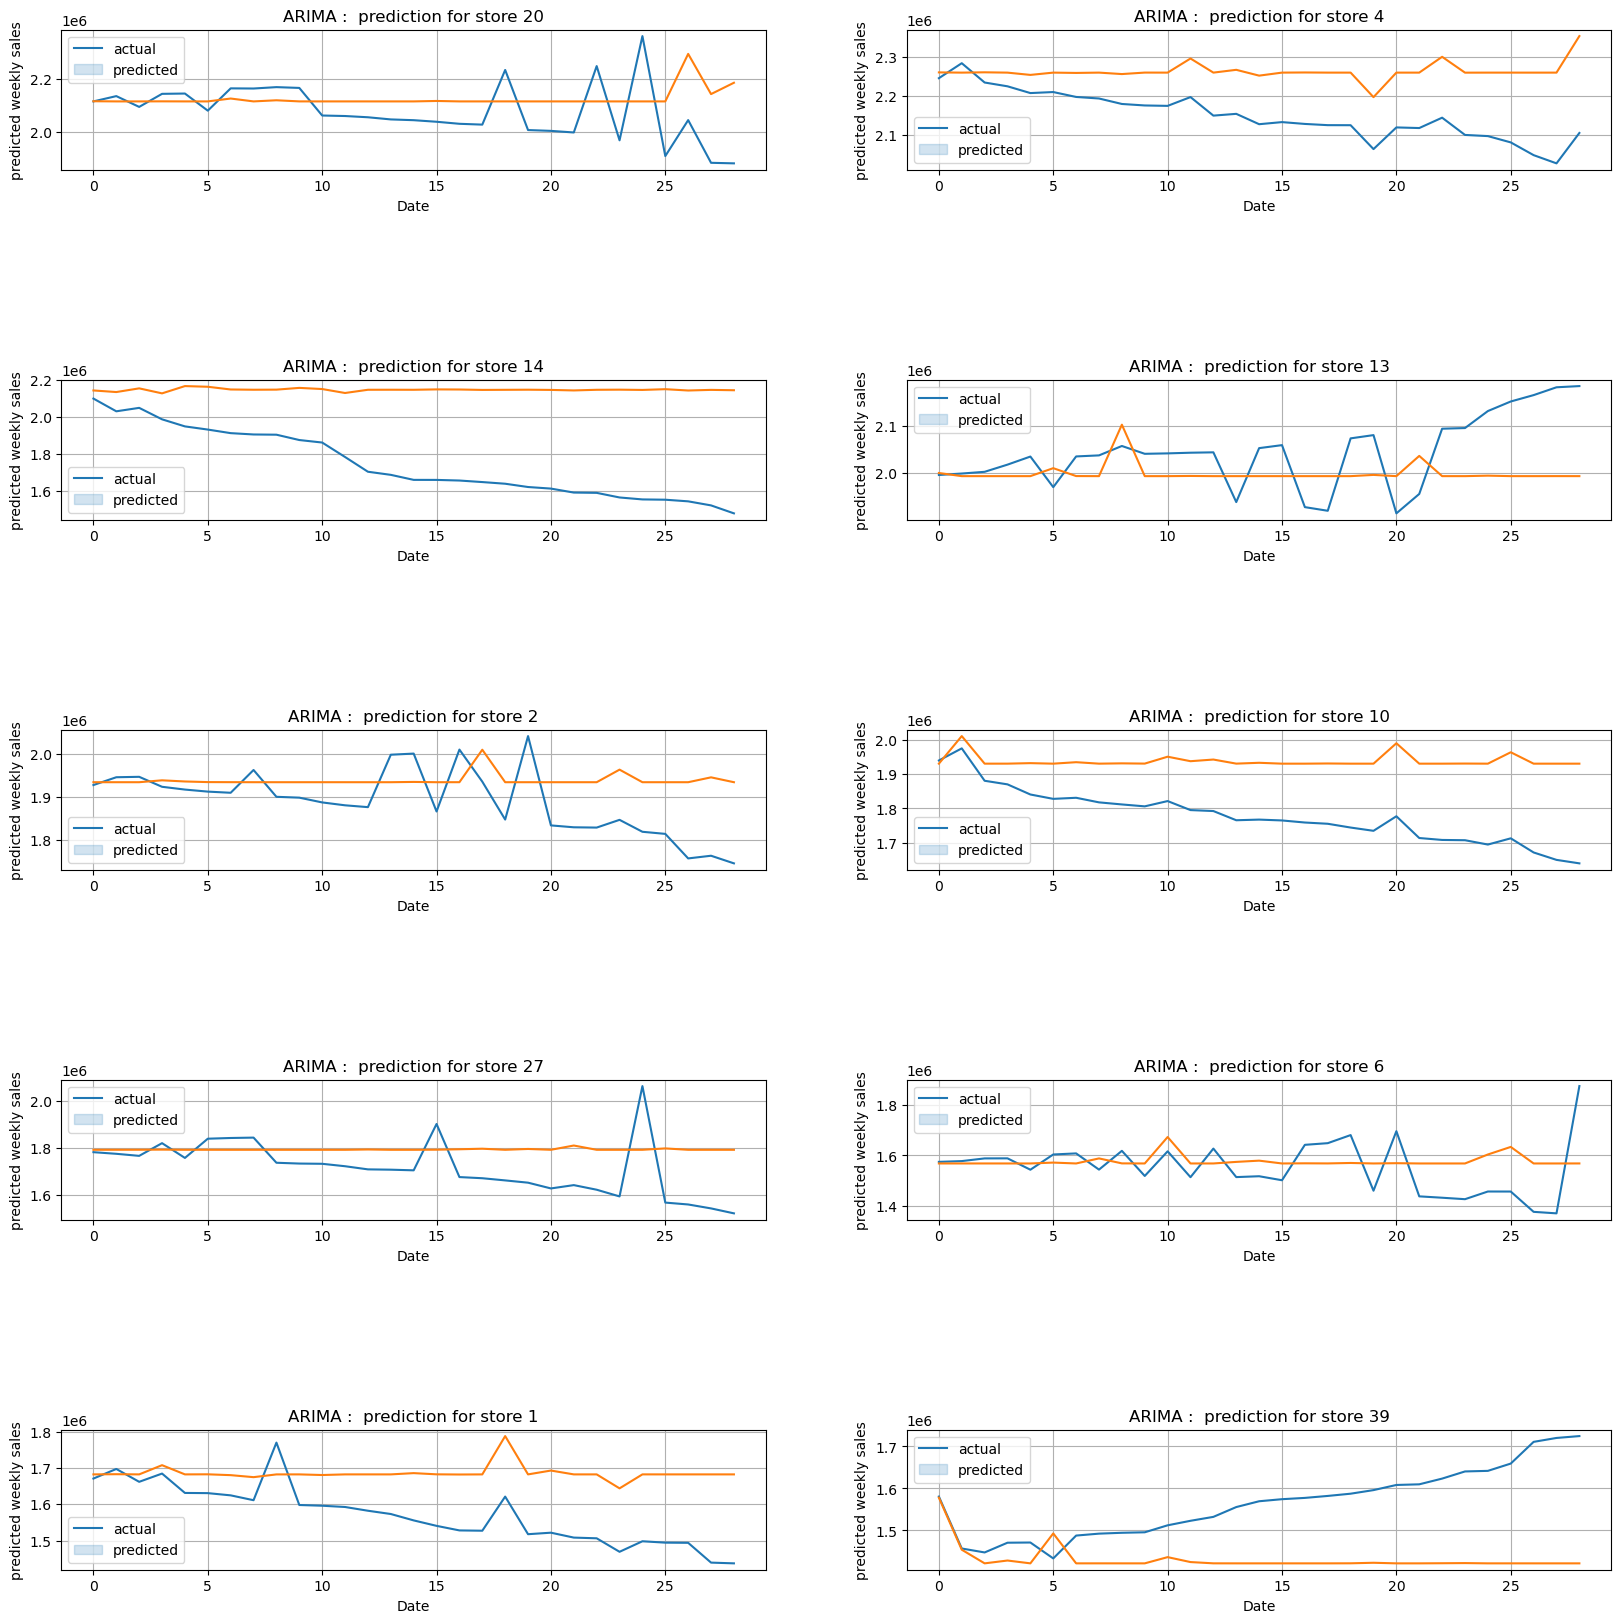

In [47]:
def plot_ts_results(predict_df, df_index, model, l=5, w=2, wl=20, ww=10, hs=1.5):
    fig, axes = plt.subplots(l, w, figsize=(wl, ww))
    plt.subplots_adjust(hspace=hs)
    
    for i in range(len(predict_df)):
        store_df = predict_df[i]
        
        # Ensure that subplot index is within the valid range
        subplot_index = i + 1
        if subplot_index > l * w:
            break  # Break out of the loop if there are more subplots than available
        
        plt.subplot(l, w, subplot_index)
        sns.lineplot(x=store_df.index, y=store_df['actual'])
        sns.lineplot(x=store_df.index, y=store_df['predicted'])
        
        plt.title(f"{model} :  prediction for store {high_12[i]}")
        plt.xlabel('Date')
        plt.ylabel('predicted weekly sales')
        plt.legend(['actual', 'predicted'], loc='best')
        plt.grid(True)
    
    plt.show()

# Example function call
plot_ts_results(predictions, test_index, "ARIMA", 5, 2, 20, 20, 1.5)


In [48]:
len(predictions)

12

In [49]:
store_df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4290     31 2010-05-02    1469252.05             0        39.05       2.572   
4291     31 2010-12-02    1543947.23             1        37.77       2.548   
4292     31 2010-02-19    1473386.75             0        39.75       2.514   
4293     31 2010-02-26    1344354.41             0        45.31       2.561   
4294     31 2010-05-03    1384870.51             0        48.61       2.625   

             CPI  Unemployment  Day  Month  Year  
4290  210.752605         8.324    2      5  2010  
4291  210.897994         8.324    2     12  2010  
4292  210.945160         8.324   19      2  2010  
4293  210.975957         8.324   26      2  2010  
4294  211.006754         8.324    3      5  2010

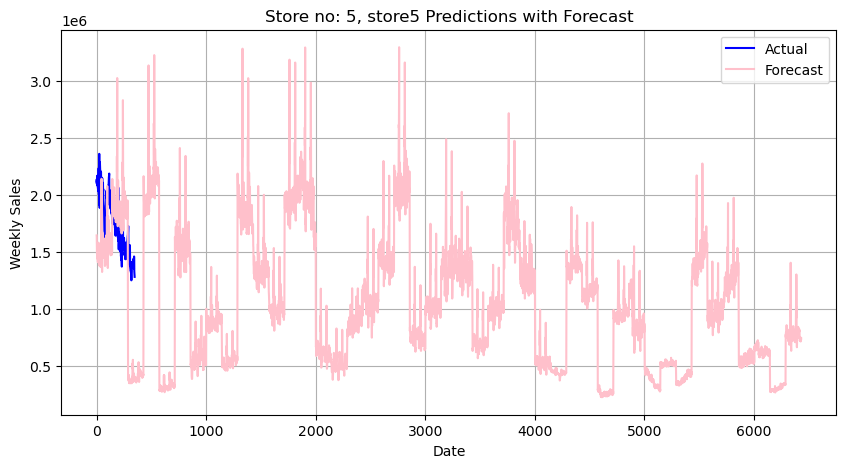

In [86]:
def make_forecast(input_data):
    
    forecast_data = walmart_df['Weekly_Sales'].rolling(window=2).mean().shift(-1)
    return forecast_data

def plot_predictions(predictions, name, store_no):
    forecast_data = make_forecast(predictions_df)

    # Concatenate historical data with forecast data
    predictions_with_forecast = pd.concat([predictions, forecast_data.rename('forecast')], axis=1)
    for i in range(len(predictions)):
        store_df = predictions.iloc[i]
        
        # Ensure that subplot index is within the valid range
        subplot_index = i + 1
        if subplot_index > i * 5:
            break  # Break out of the loop if there are more subplots than available
    fig, axes = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=predictions_with_forecast.index, y=predictions_with_forecast['actual'], color="blue", label="Actual")
    sns.lineplot(x=predictions_with_forecast.index, y=predictions_with_forecast['forecast'], color="pink", label="Forecast")

    plt.title(f"Store no: {store_no}, {name} Predictions with Forecast")
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')

    plt.legend()
    plt.grid(True)
    plt.show()

# Example function call
# Assuming 'predictions', 'name', and 'store_no' are defined elsewhere
plot_predictions(predictions_df, "store5", 5)


**1.Which store has maximum sales?**

In [50]:
walmart_df.groupby('Store')['Weekly_Sales'].sum().sort_values()

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

<Axes: title={'center': 'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

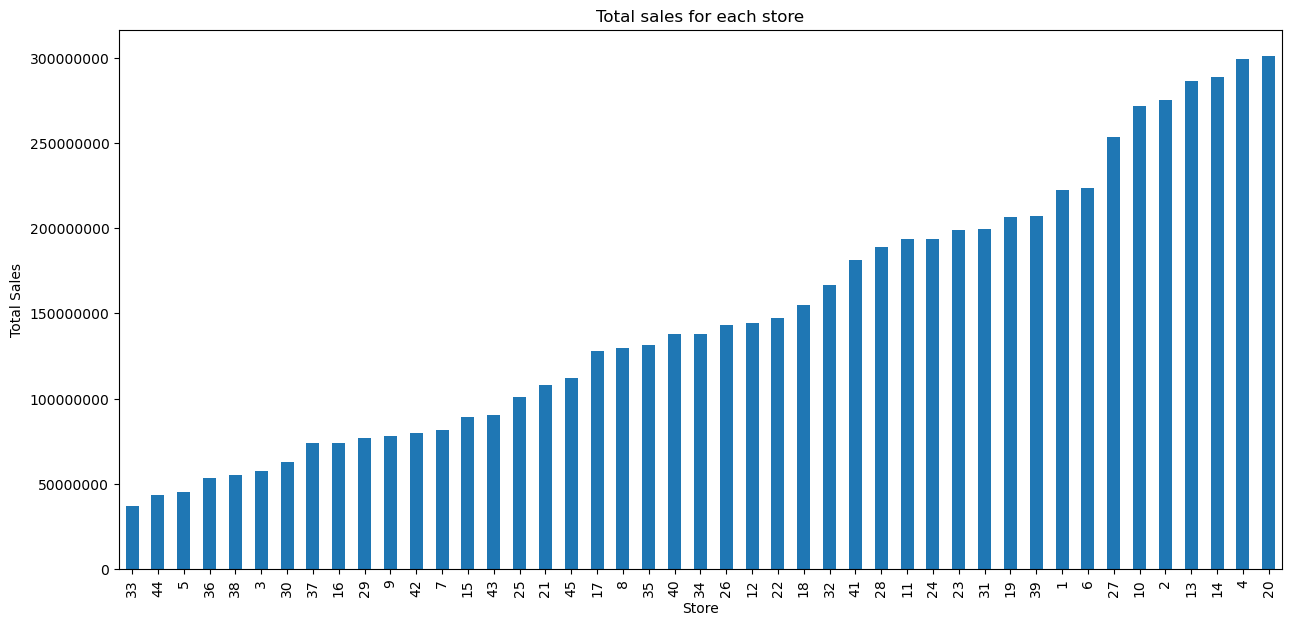

In [51]:
total_sales= walmart_df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

**from the above graph , store number 20 has maximum weekly sales , store number 33 has minimum sales**

**2. Which store has maximum standard deviation.**

In [52]:
walmart_df_std = pd.DataFrame(walmart_df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_df_std.head(1).index[0] , walmart_df_std.head(1).Weekly_Sales[walmart_df_std.head(1).index[0]]

(14, 317569.9494755081)

**The store 14 has maximum standard deviation, means sales vary alot from std**

**Extracting the sales data for store number 14 and plotting its distribution**

Text(0.5, 1.0, 'The Sales Distribution of Store No.14')

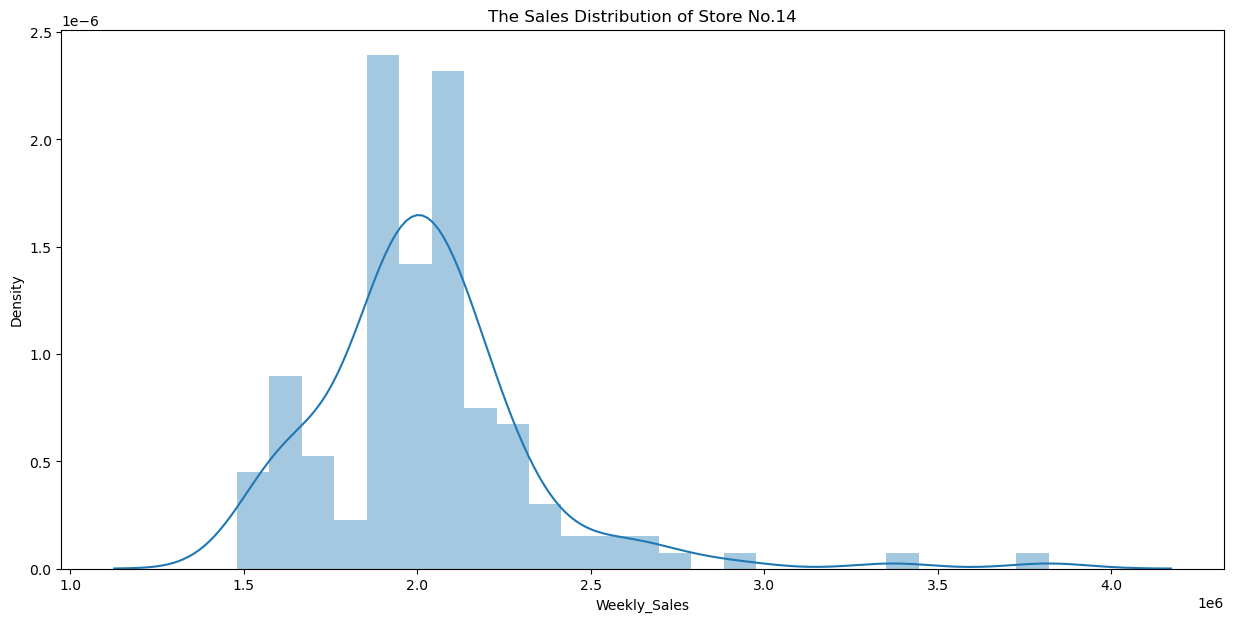

In [53]:
plt.figure(figsize=(15,7))
sns.distplot(walmart_df[walmart_df['Store'] == walmart_df_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(walmart_df_std.head(1).index[0]))


**Calculating the coefficient of mean to standard deviation**

In [54]:
coef = pd.DataFrame(walmart_df.groupby('Store')['Weekly_Sales'].std() / walmart_df.groupby('Store')['Weekly_Sales'].mean())
coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_max = coef.sort_values(by='Coefficient of mean to standard deviation',ascending=False)
coef_max.head(6)

Coefficient of mean to standard deviation
Store                                           
35                                      0.229681
7                                       0.197305
15                                      0.193384
29                                      0.183742
23                                      0.179721
21                                      0.170292

**Thus, the store which has maximum coefficient of mean to standard deviation is store number 35**

Text(0.5, 1.0, 'The Sales Distribution of Store No.35')

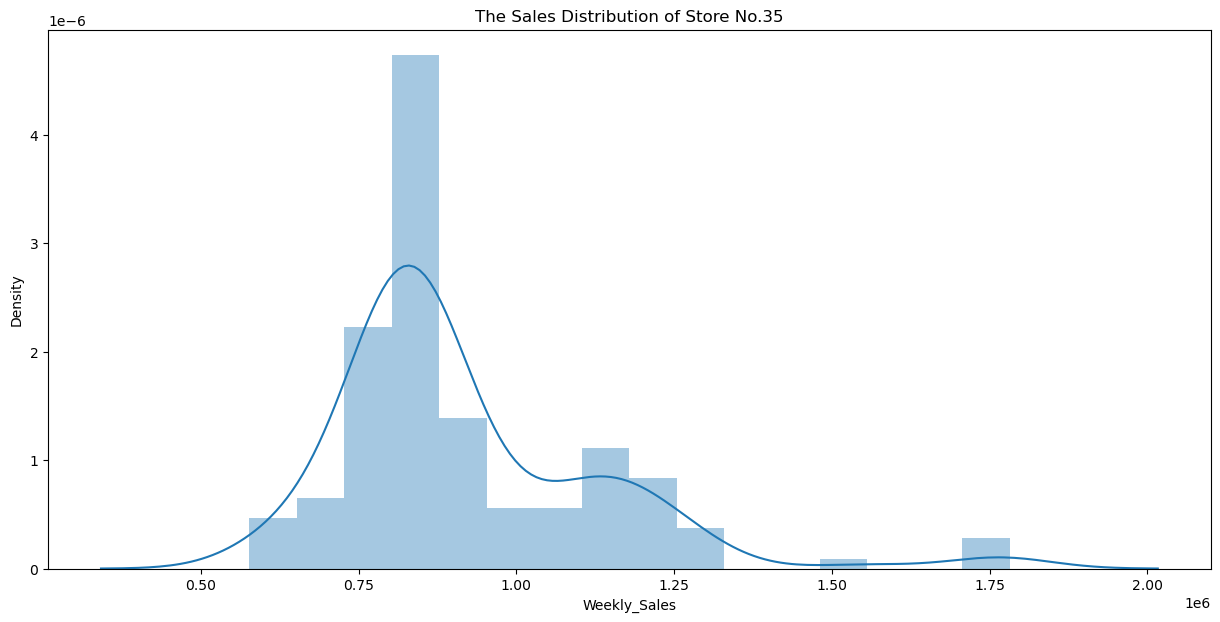

In [55]:
plt.figure(figsize=(15,7))
sns.distplot(walmart_df[walmart_df['Store'] == coef_max.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+str(coef_max.head(1).index[0]))


**3.Which store/s has good quarterly growth rate in Q3’2012**

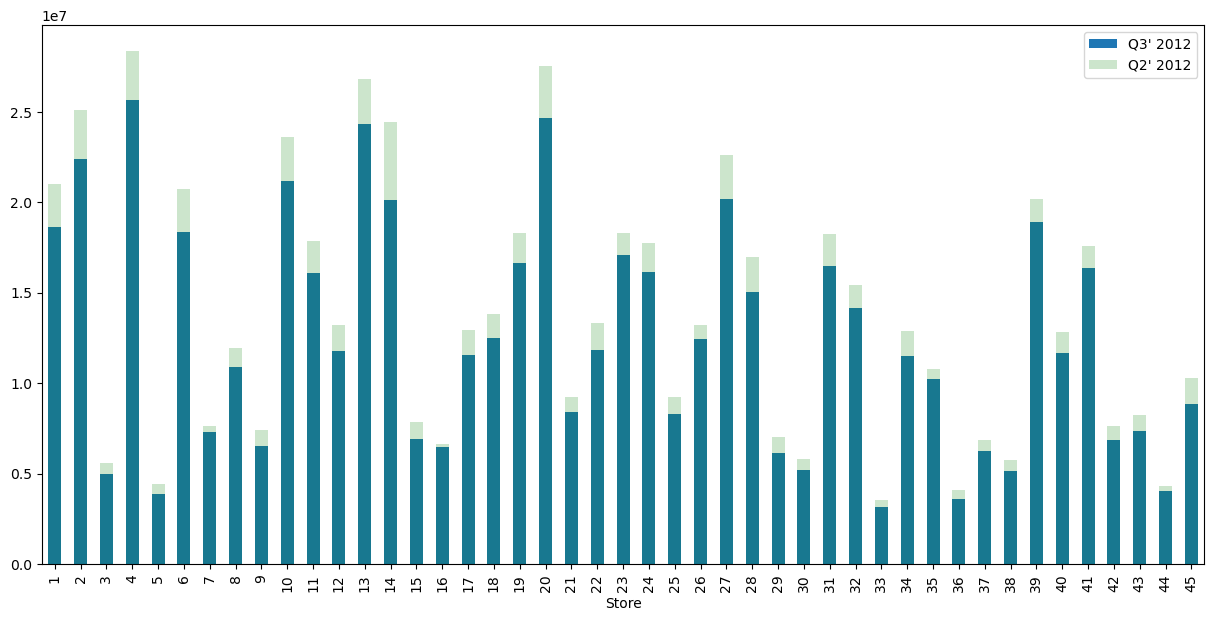

In [56]:
# Sales for second and third quarter in 2012
quarter_2_sales = walmart_df[(walmart_df['Date'] >= '2012-04-01') & (walmart_df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= walmart_df[(walmart_df['Date'] >= '2012-07-01') & (walmart_df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
quarter_2_sales.plot(ax=quarter_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

**Clearly, from the above graph, it is evident that the store which has good quarterly sales in Q3’2012 is store no. 4.**

In [57]:
#Calculating Growth rate in Q3'2012
quarter_2_sales= walmart_df[(walmart_df['Date'] >= '2012-04-01') & (walmart_df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= walmart_df[(walmart_df['Date'] >= '2012-07-01') & (walmart_df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = ((quarter_3_sales - quarter_2_sales )/quarter_2_sales)*100
quarterly_growth_rate.sort_values(ascending=False).head()


Store
16   -2.789294
7    -3.824738
35   -4.663086
26   -6.057624
39   -6.396875
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Store'>

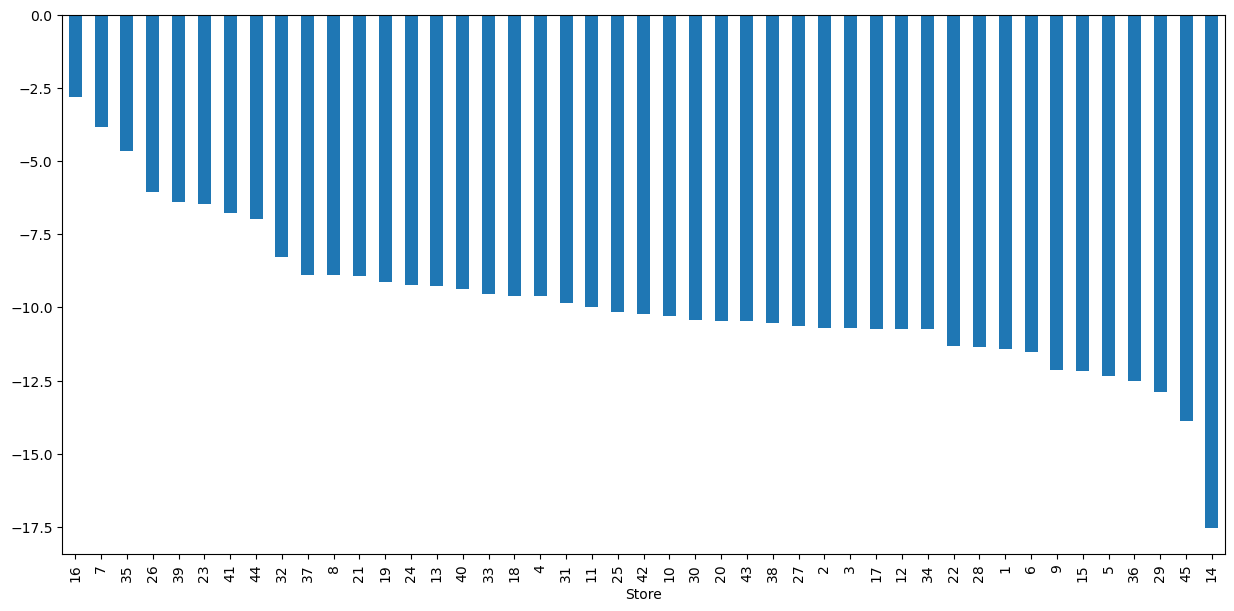

In [58]:
plt.figure(figsize=(15,7))
quarterly_growth_rate.sort_values(ascending=False).plot(kind='bar')

**Here, there is no store which has performed better in the 3rd quarter as compared to the 2nd quarter.**

**4.Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.**

**Holiday Events:**

**Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13**

**Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13**

**Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13**

**Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13**

In [59]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

**Calculating mean sales on holidays :**

In [60]:
Super_Bowl_Sales = (pd.DataFrame(walmart_df.loc[walmart_df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(walmart_df.loc[walmart_df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(walmart_df.loc[walmart_df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(walmart_df.loc[walmart_df.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037038, 1042427.293925926, 1471273.427777778, 960833.1115555555)

**Calculating mean sales on non-holidays :**

In [61]:
Non_Holiday_Sales = walmart_df[walmart_df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088555

In [62]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037038,
 'Labour_Day_Sales': 1042427.293925926,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555555,
 'Non_Holiday_Sales': 1041256.3802088555}

**Clearly, Thanksgiving has higher sales than the mean sales on non-holidays.**

**5.Provide a monthly and semester view of sales in units and give insights.**

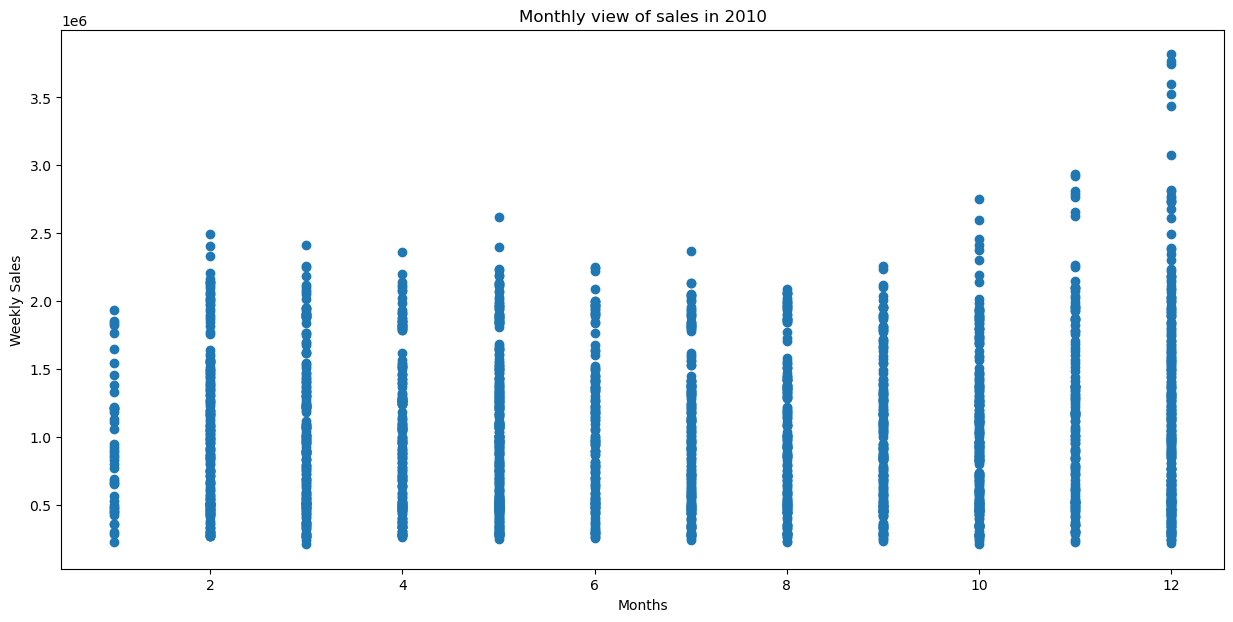

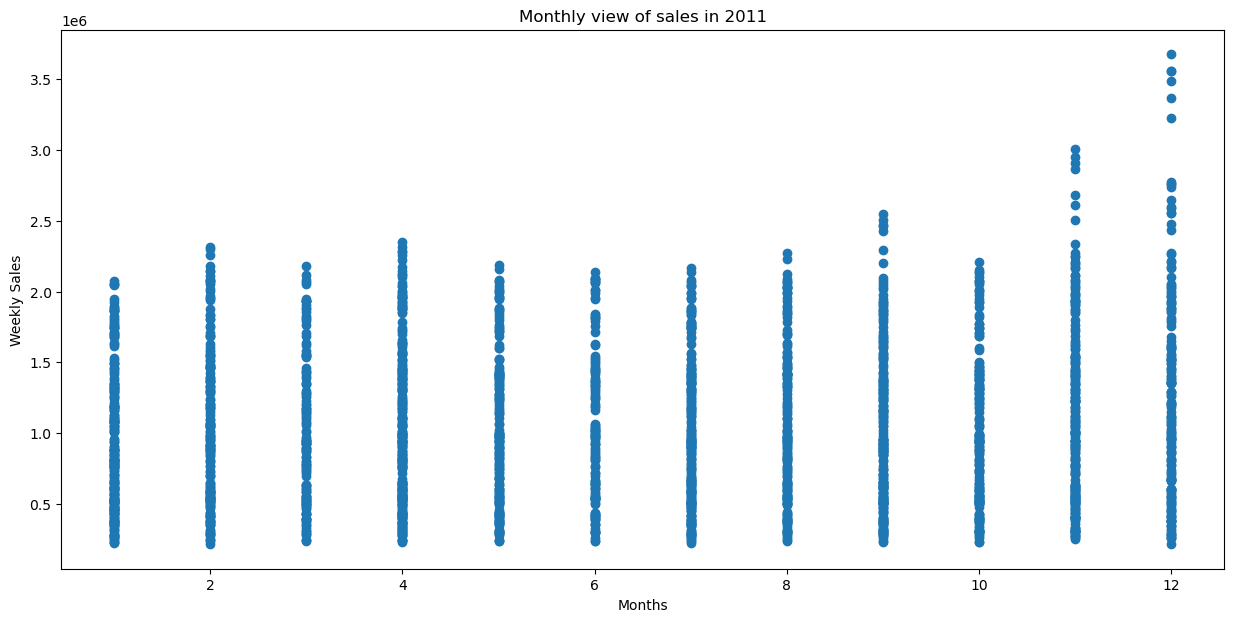

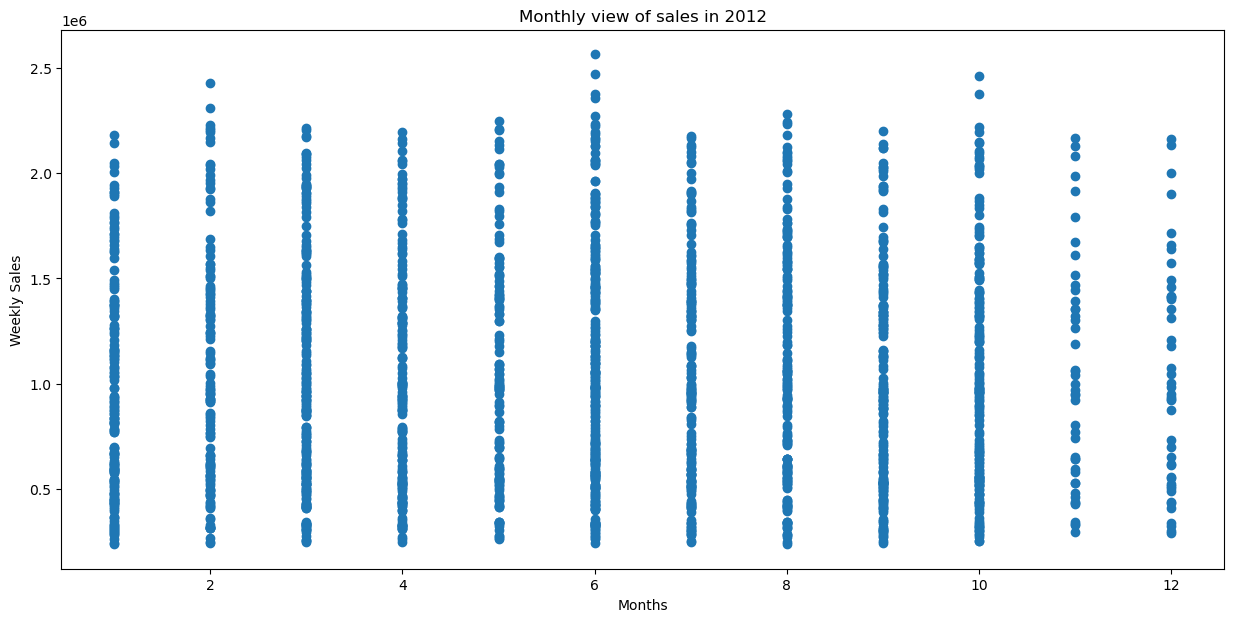

In [63]:
#Year-wise Monthly Sales

plt.figure(figsize=(15,7))
plt.scatter(walmart_df[walmart_df.Year==2010]["Month"],walmart_df[walmart_df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_df[walmart_df.Year==2011]["Month"],walmart_df[walmart_df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_df[walmart_df.Year==2012]["Month"],walmart_df[walmart_df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

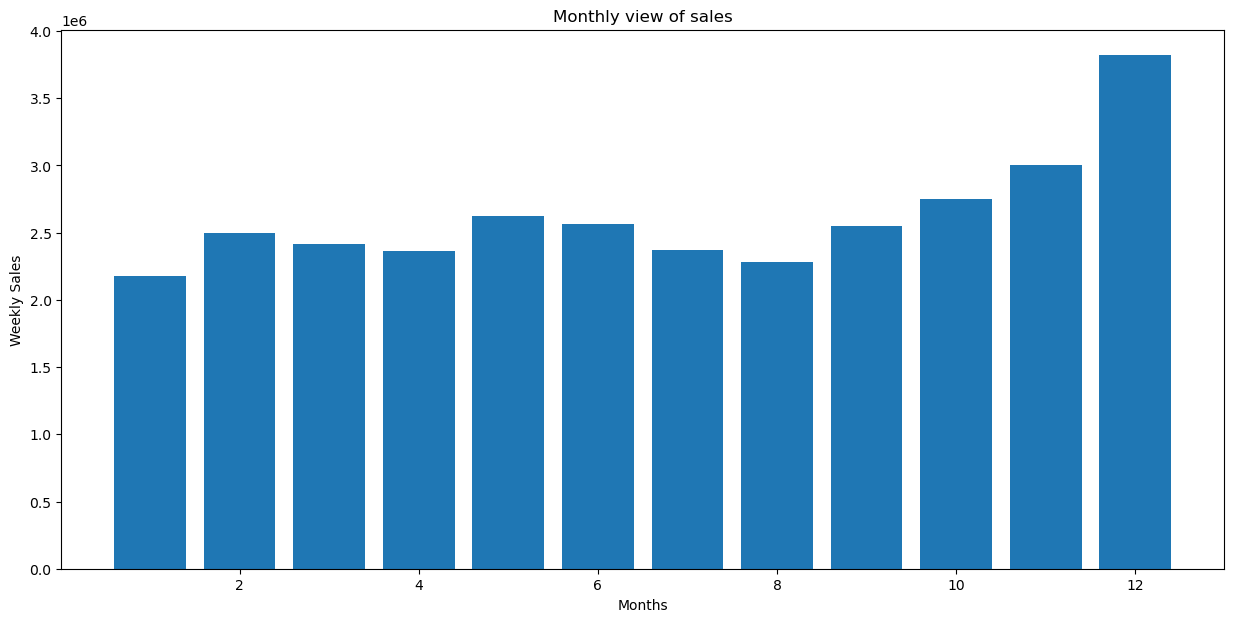

In [64]:
#Overall Monthly Sales
plt.figure(figsize=(15,7))
plt.bar(walmart_df["Month"],walmart_df["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

<Figure size 1500x700 with 0 Axes>

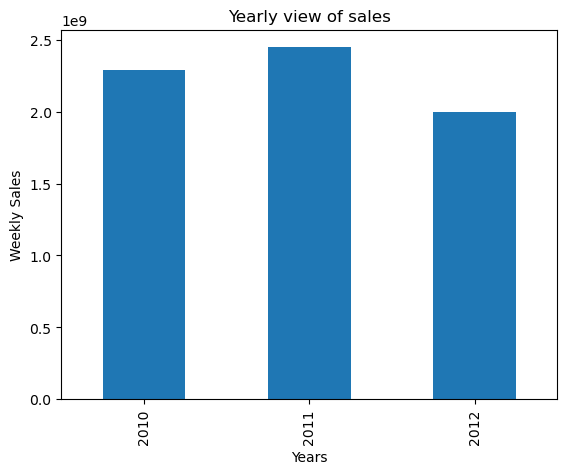

In [65]:
#Yearly Sales
plt.figure(figsize=(15,7))
walmart_df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

**Here, overall monthly sales are higher in the month of December while the yearly sales in the year 2011 are the highest.**

**for Store 1 – Build prediction models to forecast demand : Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. Change dates into days by creating new variable. Select the model which gives best accuracy.**

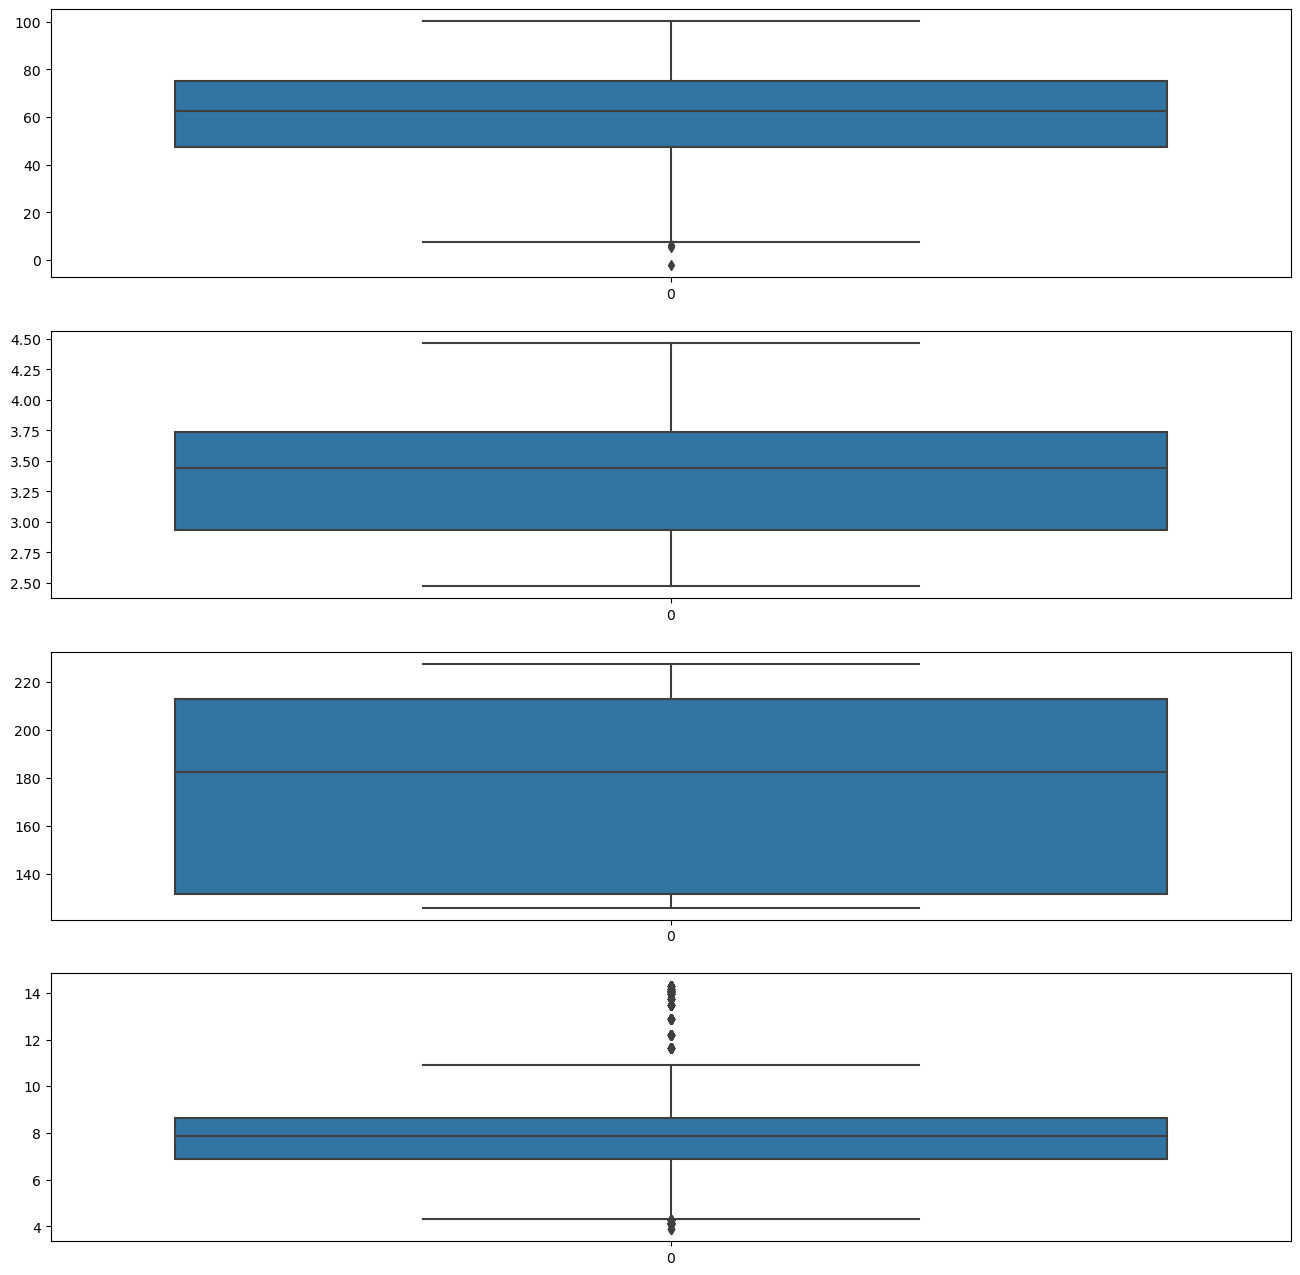

In [66]:
#Detecting outliers :
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_df[column],ax=axis[i])

In [67]:
# Dropping outliers     
walmart_df_clean = walmart_df[(walmart_df['Unemployment']<10) & (walmart_df['Unemployment']>4.5) & (walmart_df['Temperature']>10)]
walmart_df_clean

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Day  Month  Year  
0     211.096358         8.106    2      5  2010  
1     211.242170         8.106    2     12  2010  
2     211.289143         8.106   19      2  2010  
3     211.319643         8.106   26      2  2010  
4     211.350143         8.106    3      5  2010  
...          ...           ...  ...    ...   ...  
6430  192.013558         8.684   28      9  2012  
6431  192.170412         8.667   10      5  2012  
6432  192.327265         8.667   10     12  2012  
6433  192.330854         8.667   19     10  2012  
6434  192.308899         8.667   26     10  2012  

[5658 rows x 11 columns]

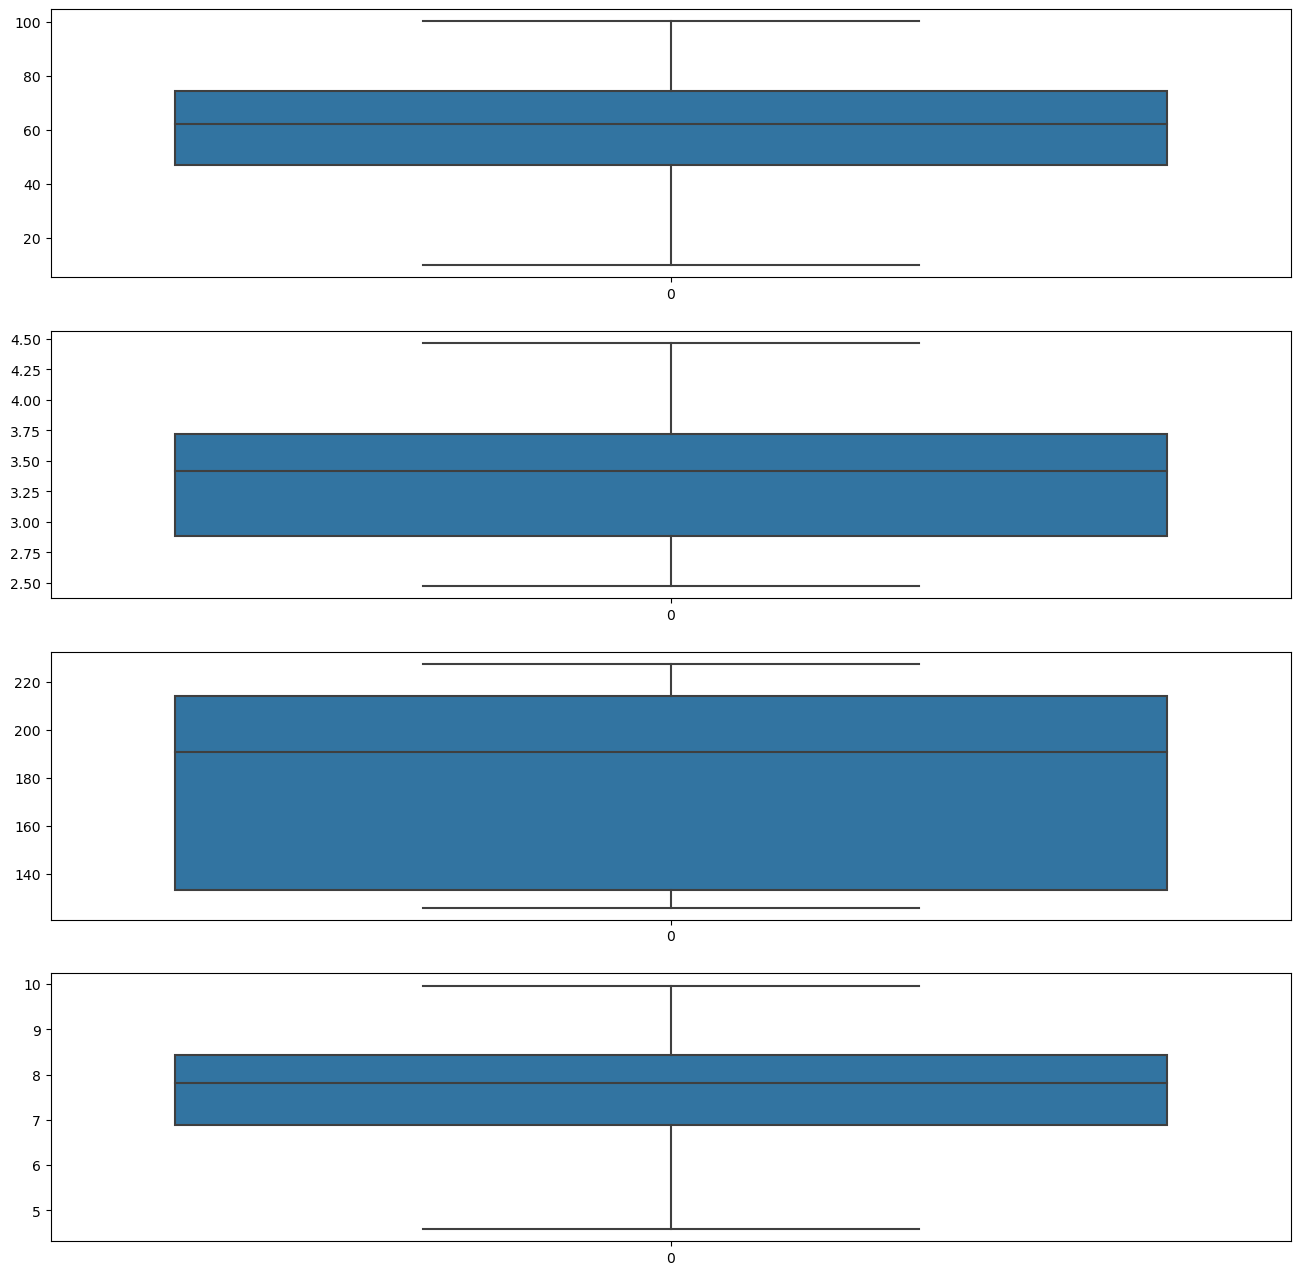

In [68]:
#Checking data for outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_df_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_df_clean[column], ax=axis[i])

In [69]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = walmart_df_clean[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = walmart_df_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 12.16413503459849
Mean Absolute Error: 428333.41990933055
Mean Squared Error: 260710817219.49414
Root Mean Squared Error: 510598.4892452132


<Axes: >

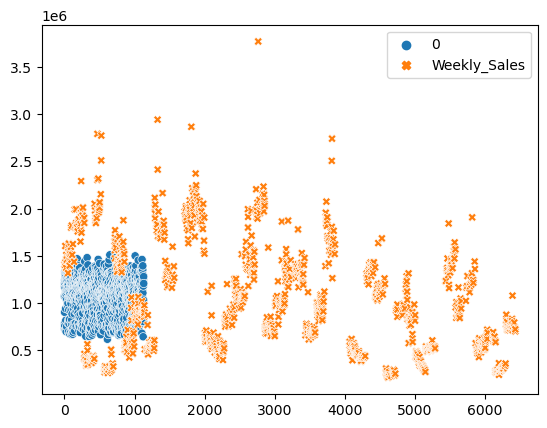

In [70]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot([Y_pred, Y_test])

Random Forest Regressor:

Accuracy: 94.8445746936709
Mean Absolute Error: 65966.70741439932
Mean Squared Error: 15973485013.435917
Root Mean Squared Error: 126386.25326132553


<Axes: >

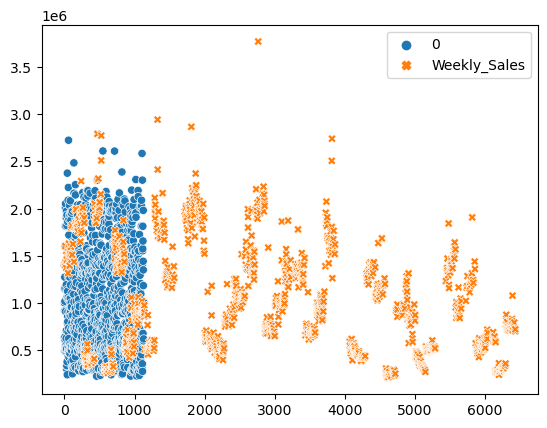

In [71]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot([Y_pred, Y_test])

**Here, Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95% , so, it is the best model to forecast demand.**